In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
DATASET_PATH = "Data/dublinbikes_20200101_20200401.csv"
DUBLIN_MAPPATH = "Data/map_dublin.png"

In [3]:
df_bikes_2020_q1_usage = pd.read_csv(DATASET_PATH)
df_bikes_2020_q1_usage["TIME"] = pd.to_datetime(df_bikes_2020_q1_usage["TIME"])
df_bikes_2020_q1_usage.rename(columns={"STATION ID": "STATION_ID"},inplace=True)
df_bikes_2020_q1_usage.head()

STATION_ID                TIME         LAST UPDATED                NAME  \
0           2 2020-01-01 06:25:02  2020-01-01 06:24:06  BLESSINGTON STREET   
1           2 2020-01-01 06:30:02  2020-01-01 06:24:06  BLESSINGTON STREET   
2           2 2020-01-01 06:35:02  2020-01-01 06:34:15  BLESSINGTON STREET   
3           2 2020-01-01 06:40:03  2020-01-01 06:37:22  BLESSINGTON STREET   
4           2 2020-01-01 06:45:02  2020-01-01 06:37:22  BLESSINGTON STREET   

   BIKE STANDS  AVAILABLE BIKE STANDS  AVAILABLE BIKES STATUS  \
0           20                     18                2   Open   
1           20                     18                2   Open   
2           20                     18                2   Open   
3           20                     20                0   Open   
4           20                     20                0   Open   

              ADDRESS  LATITUDE  LONGITUDE  
0  Blessington Street  53.35677   -6.26814  
1  Blessington Street  53.35677   -6.26814  
2  Blessington Street  53.35677   -6.26814  
3  Blessington Street  53.35677   -6.26814  
4  Blessington Street  53.35677   -6.26814

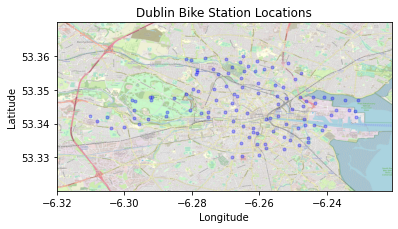

In [4]:
spatial_df = df_bikes_2020_q1_usage[['LONGITUDE', "LATITUDE"]]
spatial_df = spatial_df.drop_duplicates()
spatial_data_boundaries = ((spatial_df.LONGITUDE.min()-0.01,   spatial_df.LONGITUDE.max()+0.01,      
         spatial_df.LATITUDE.min()-0.01, spatial_df.LATITUDE.max()+0.01))
dublin_map = plt.imread(DUBLIN_MAPPATH)
plt.scatter(spatial_df.LONGITUDE, spatial_df.LATITUDE, alpha= 0.3, c='b', s=9)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.xlim(spatial_data_boundaries[0],spatial_data_boundaries[1])
plt.ylim(spatial_data_boundaries[2],spatial_data_boundaries[3])
plt.title('Dublin Bike Station Locations')
plt.imshow(dublin_map, extent = spatial_data_boundaries, aspect= 'equal')
plt.savefig('Plots/stations_on_map.png')

In [5]:
# Listing all the sites on the far ends of the city.
select_outskirt_site = spatial_df.loc[ (spatial_df['LATITUDE'] > 53.34) & (spatial_df['LATITUDE'] < 53.345) & (spatial_df['LONGITUDE'] <-6.30)]
outskirt_site_options = select_outskirt_site.to_numpy()

df_site_selection = df_bikes_2020_q1_usage.copy()
for latitude,longitude in outskirt_site_options:
    df_site = df_site_selection.loc[ (df_site_selection['LONGITUDE'] ==latitude	) & (df_site_selection['LATITUDE'] == longitude)]
    print('\nStation ID and Address')
    print(df_site['STATION_ID'].unique(), df_site['ADDRESS'].unique())

select_outskirt_site = spatial_df.loc[ (spatial_df['LATITUDE'] < 53.331) & (spatial_df['LONGITUDE'] <-6.24)]
outskirt_site_options = select_outskirt_site.to_numpy()

df_site_selection = df_bikes_2020_q1_usage.copy()
for latitude,longitude in outskirt_site_options:
    df_site = df_site_selection.loc[ (df_site_selection['LONGITUDE'] ==latitude	) & (df_site_selection['LATITUDE'] == longitude)]
    print('\nStation ID and Address')
    print(df_site['STATION_ID'].unique(), df_site['ADDRESS'].unique())




Station ID and Address
[83] ['Emmet Road']

Station ID and Address
[96] ['Kilmainham Lane']

Station ID and Address
[97] ['Kilmainham Gaol']

Station ID and Address
[5] ['Charlemont Street']

Station ID and Address
[34] ['Portobello Harbour']

Station ID and Address
[43] ['Portobello Road']


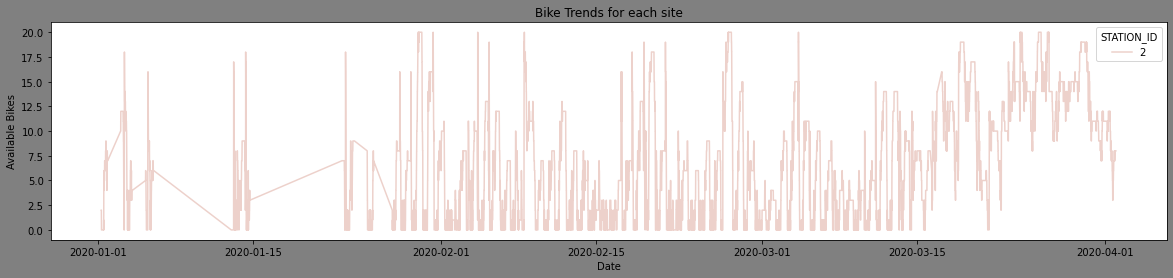

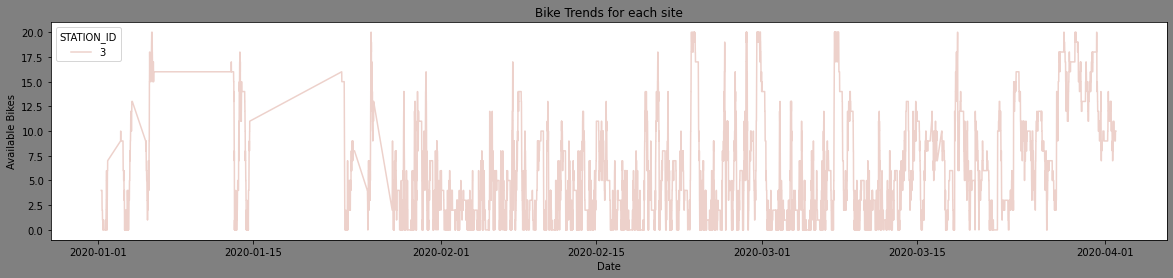

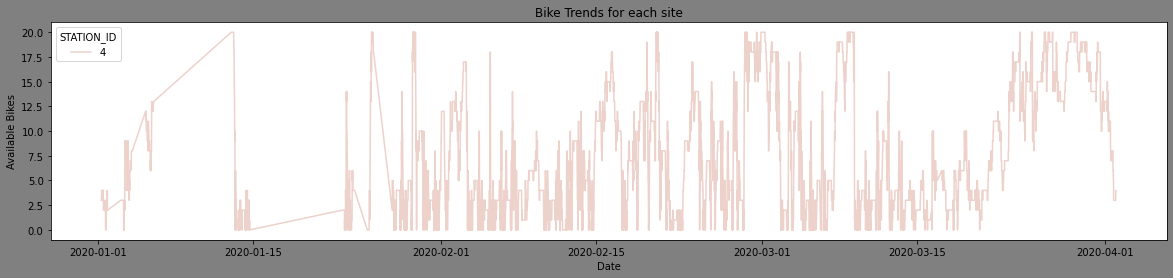

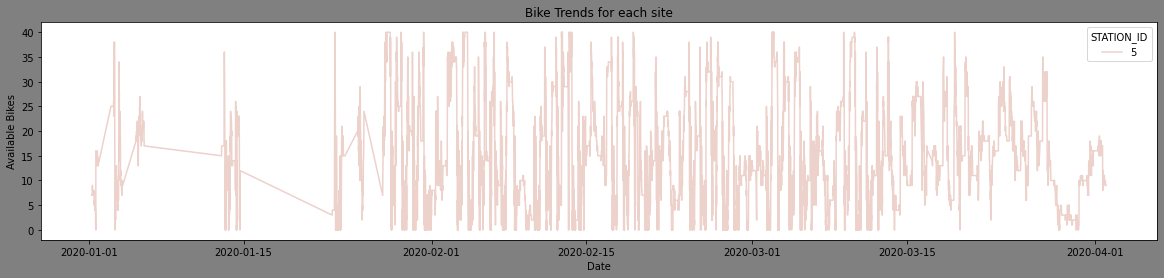

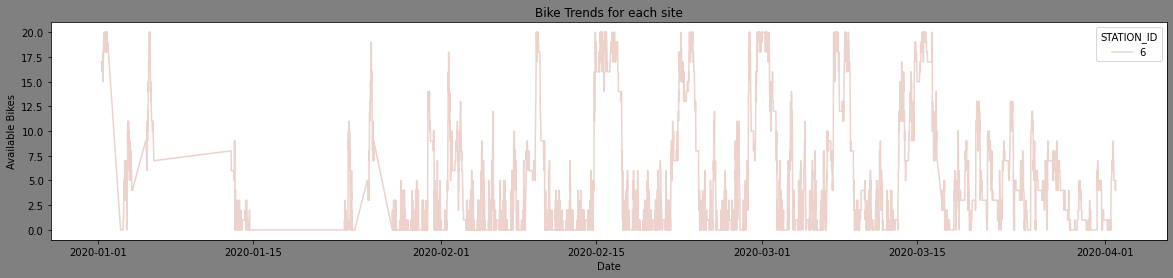

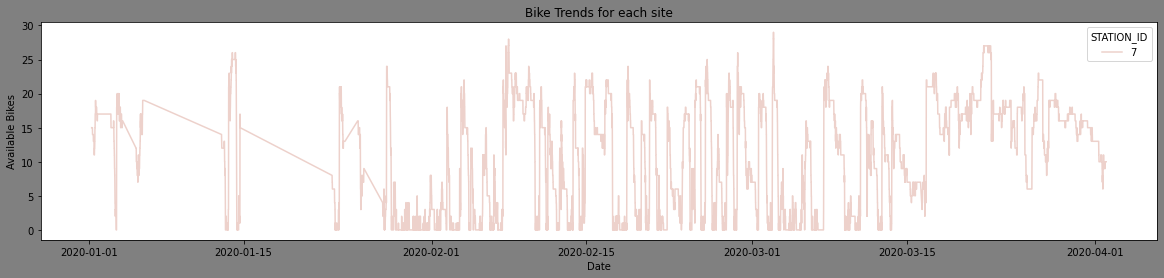

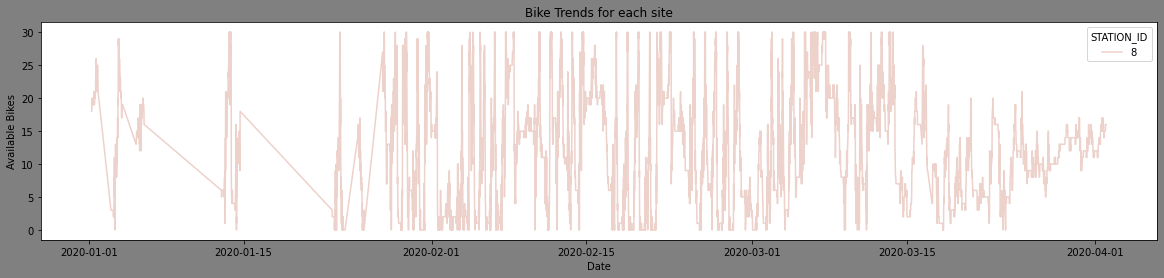

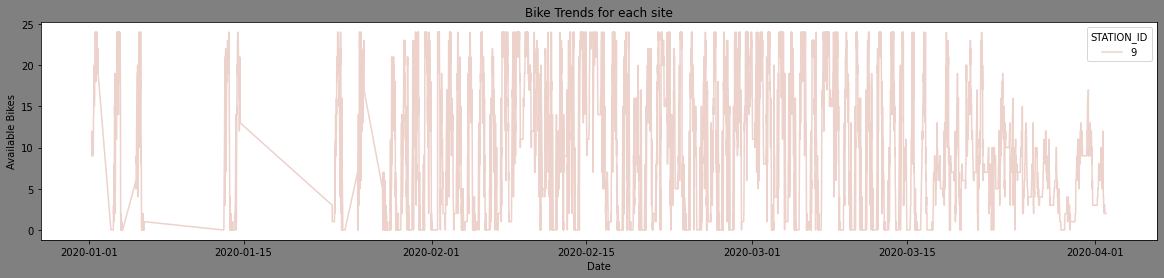

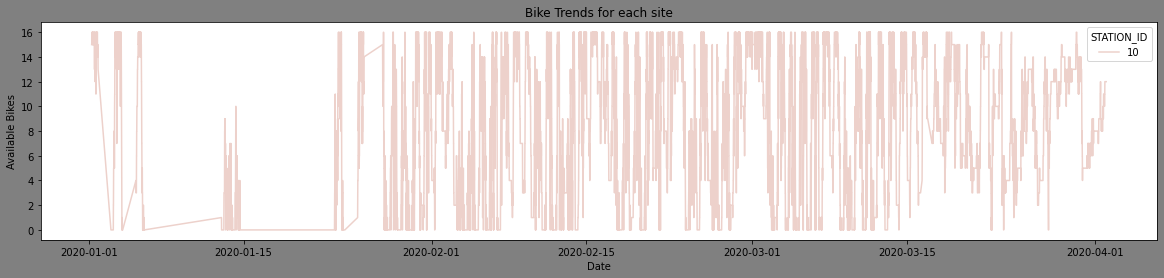

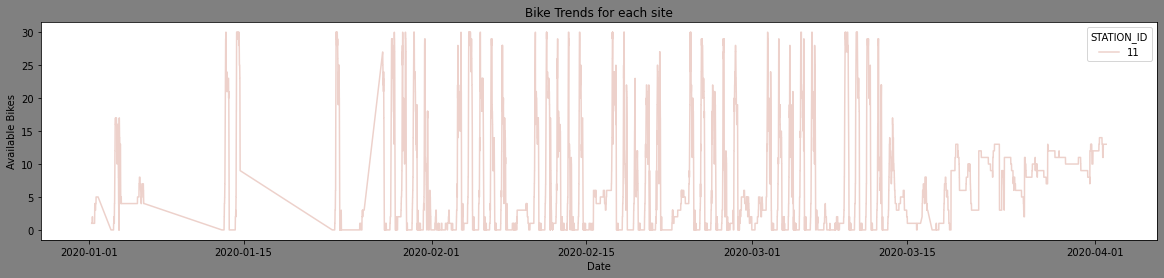

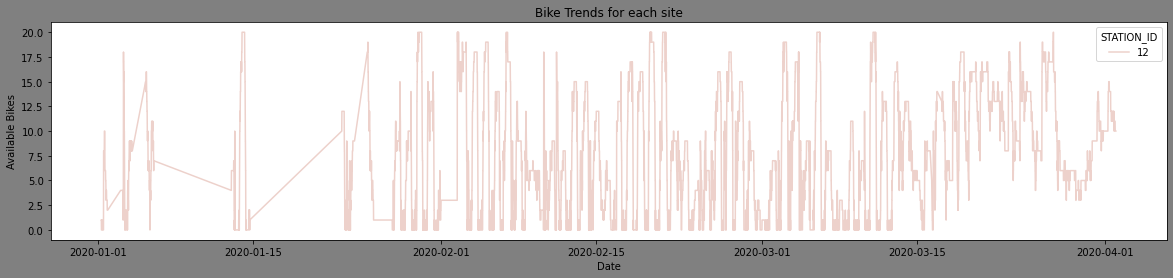

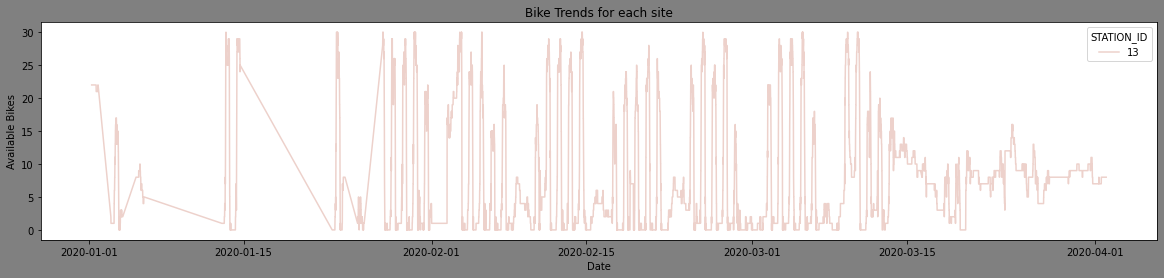

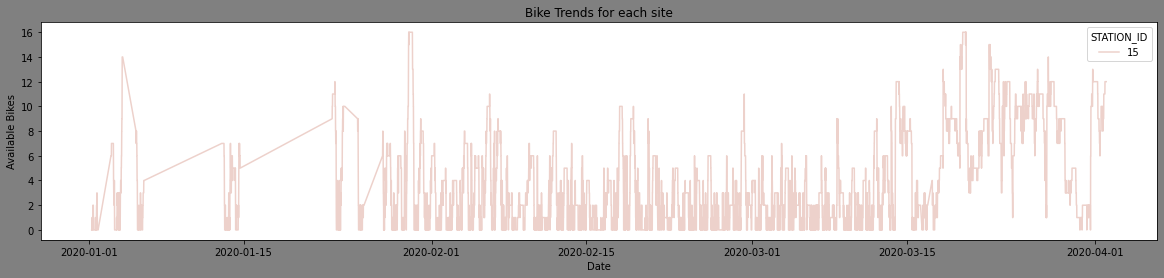

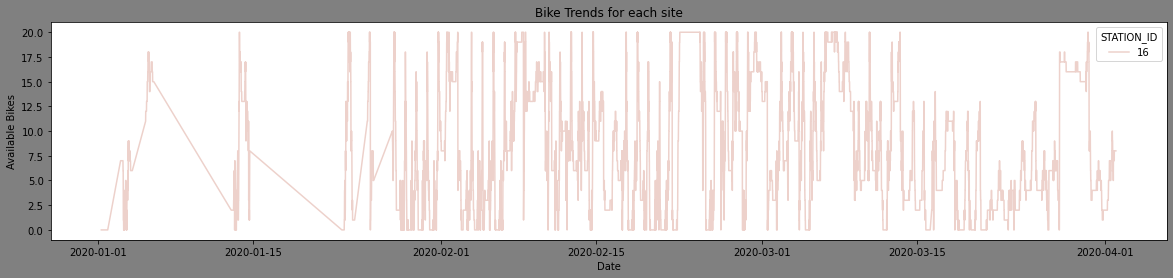

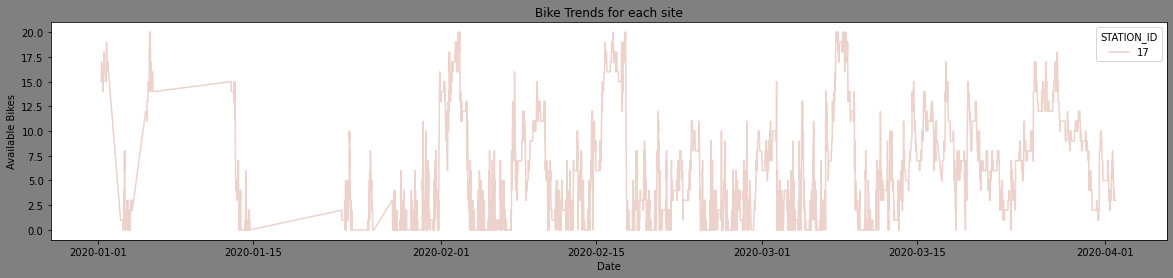

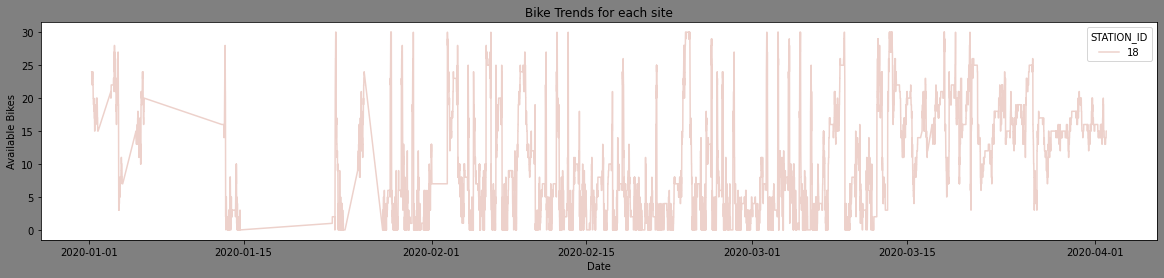

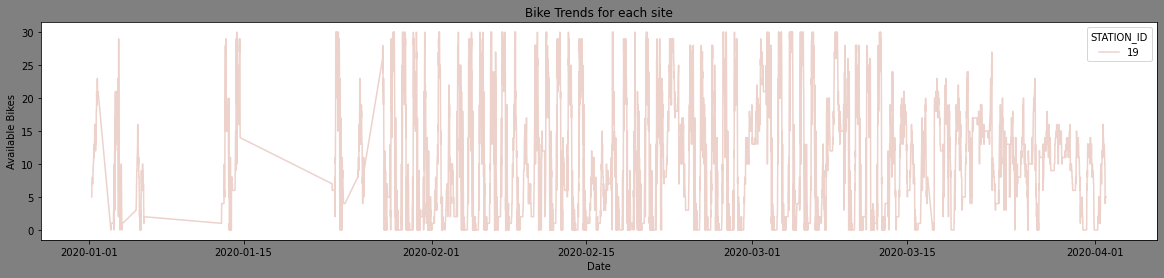

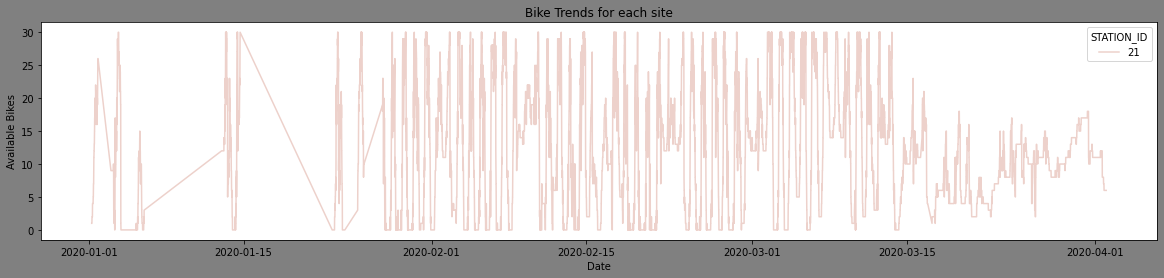

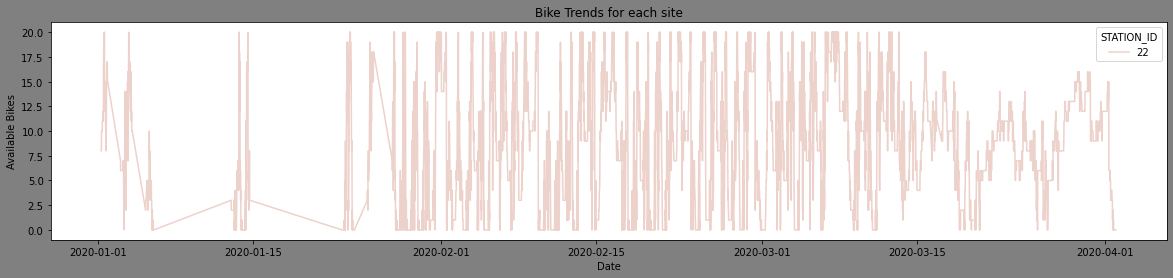

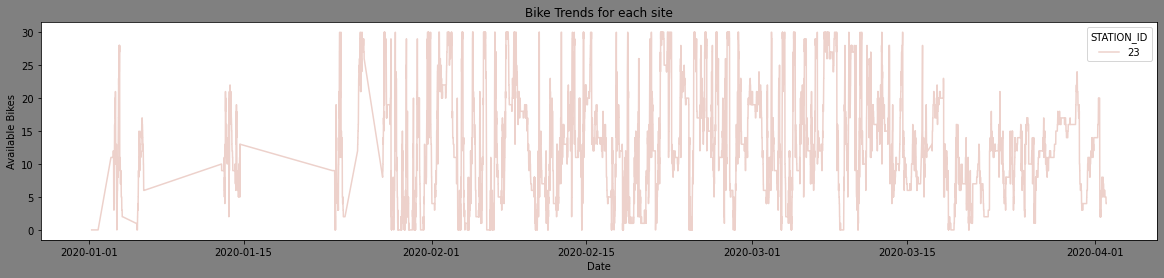

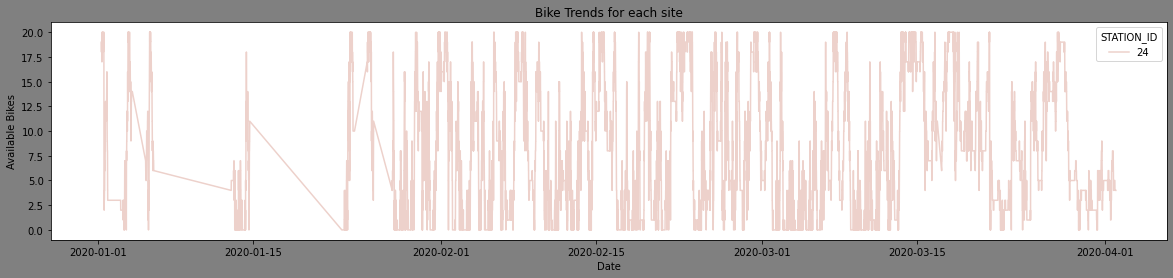

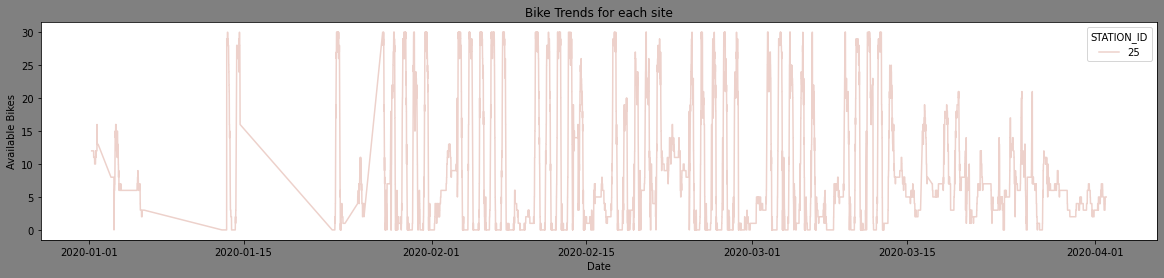

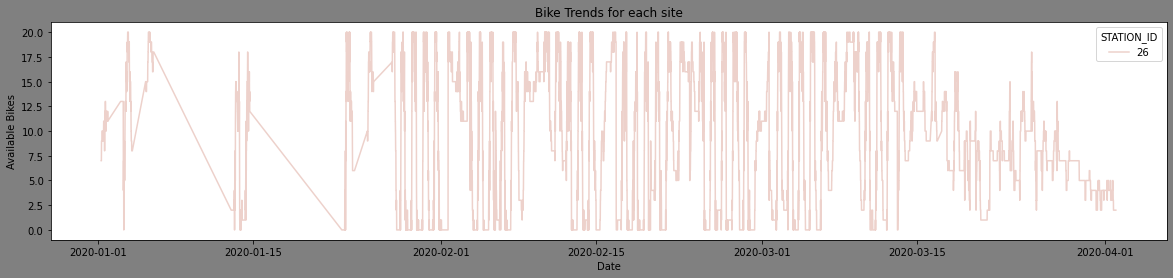

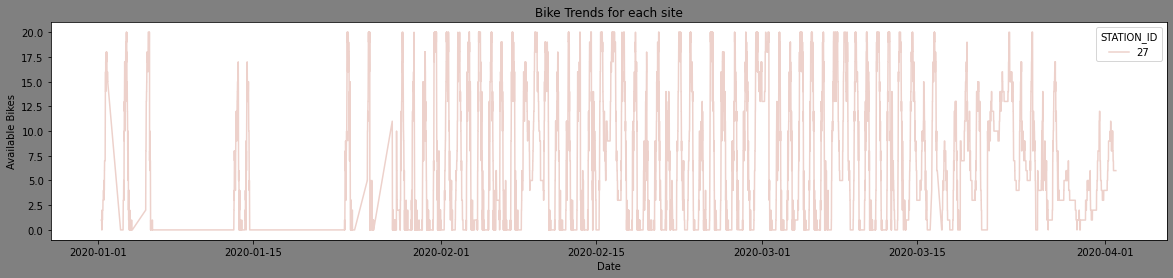

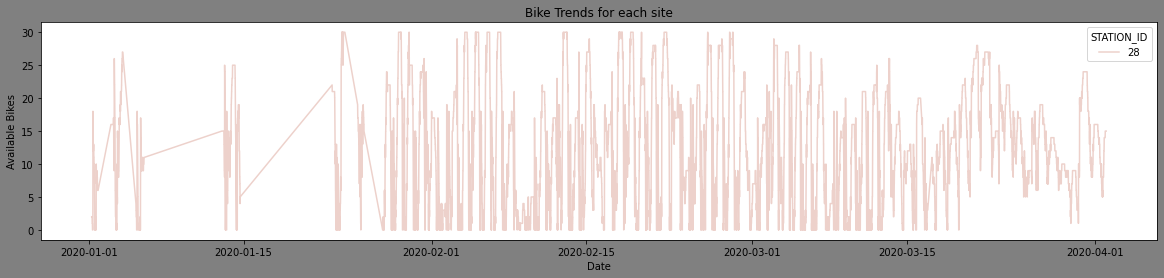

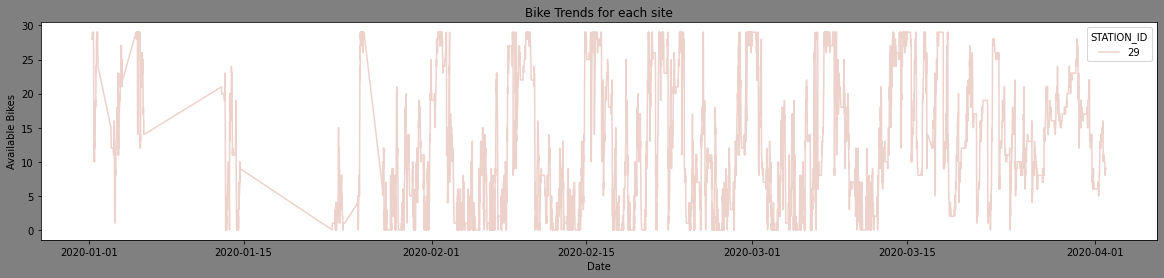

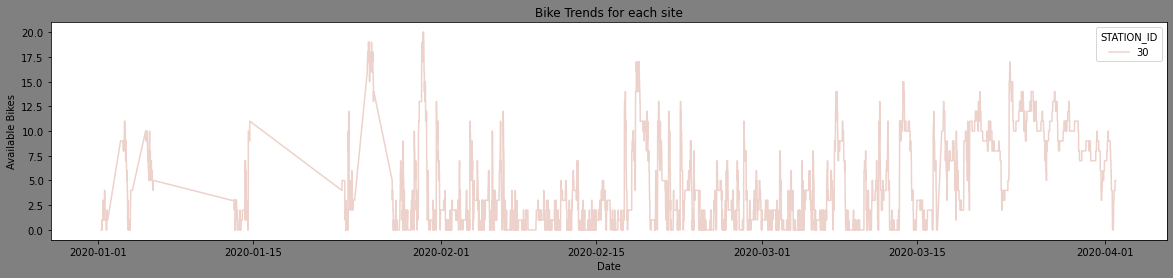

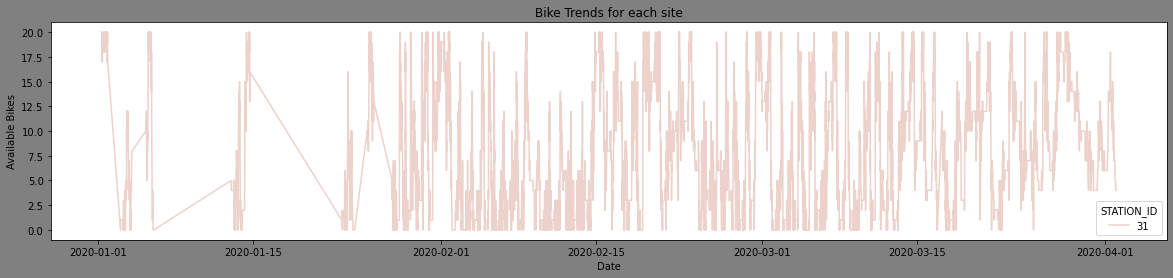

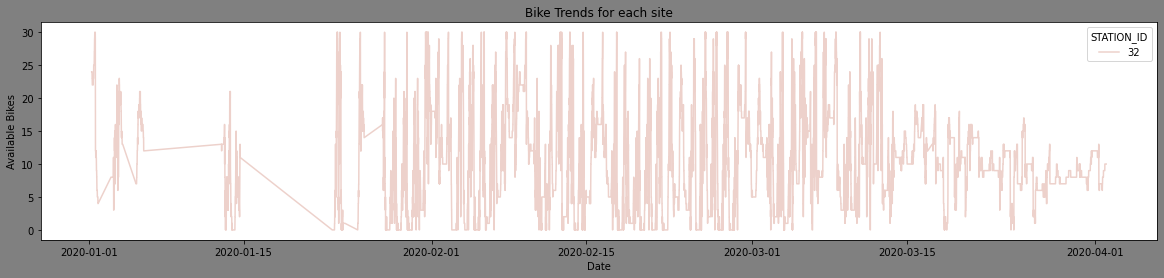

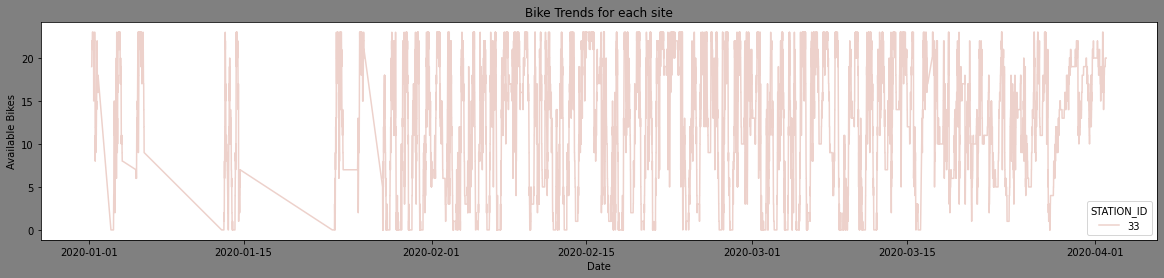

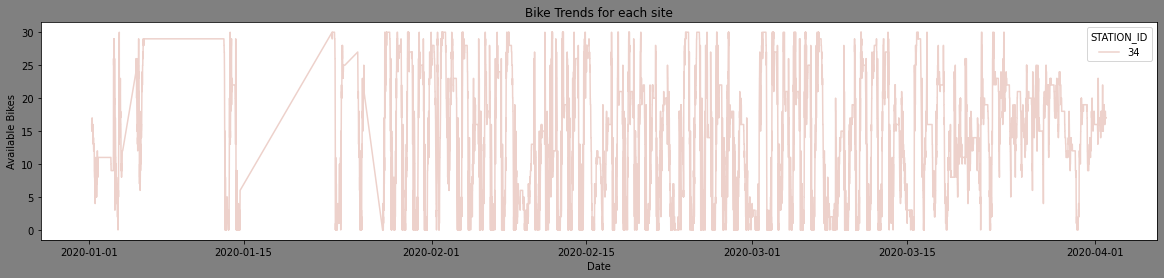

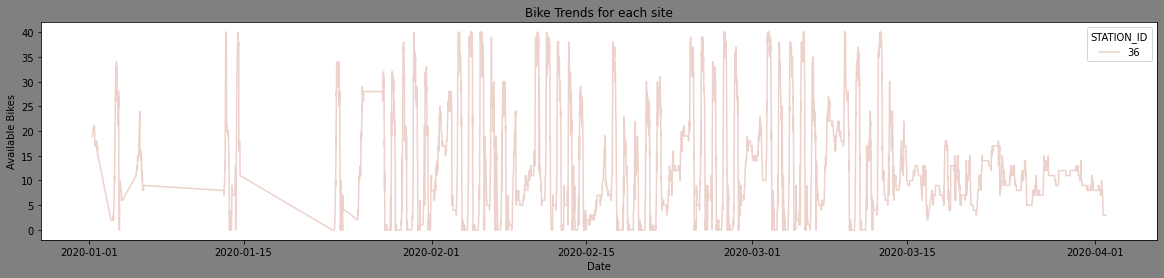

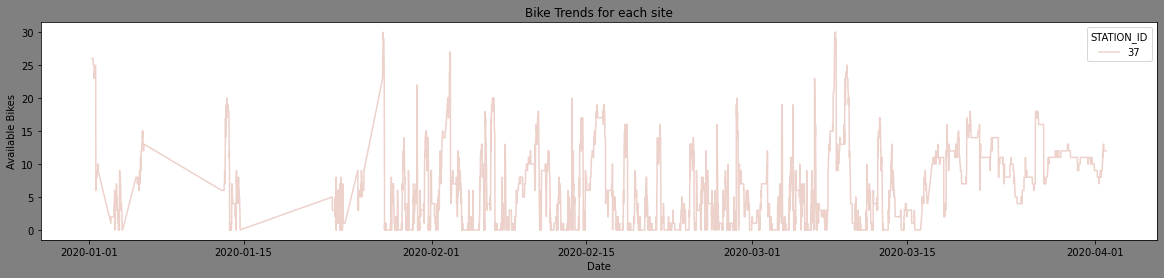

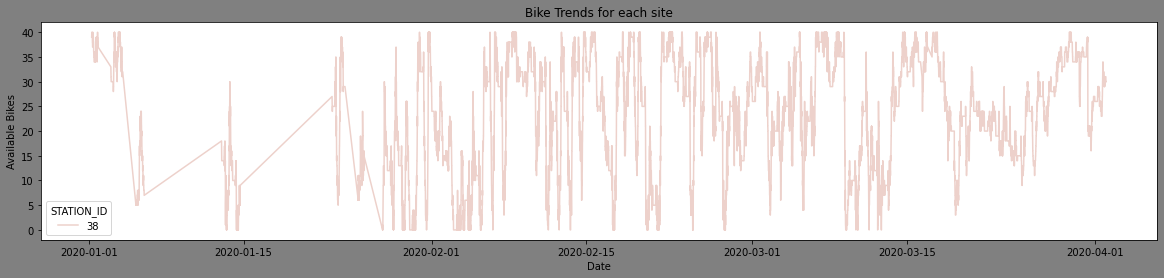

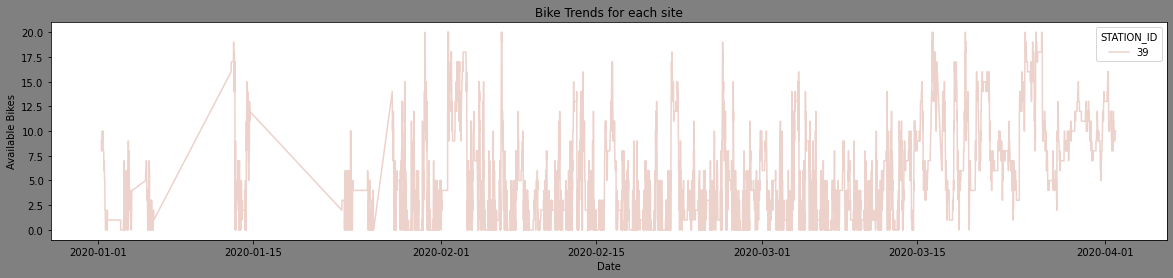

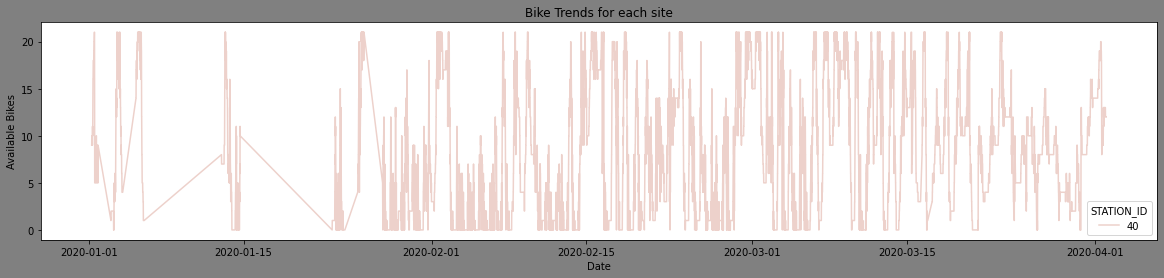

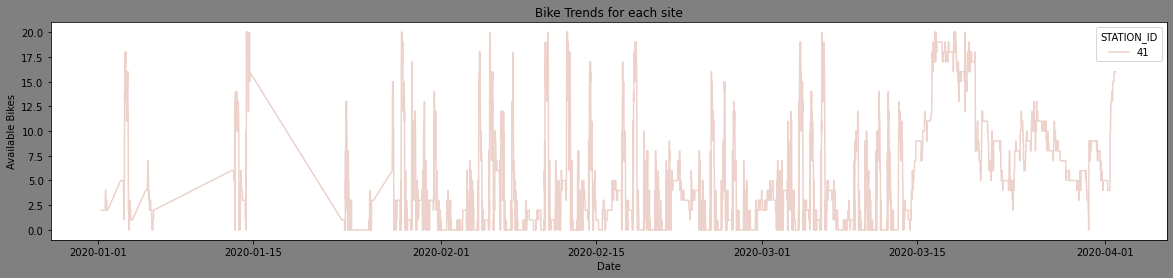

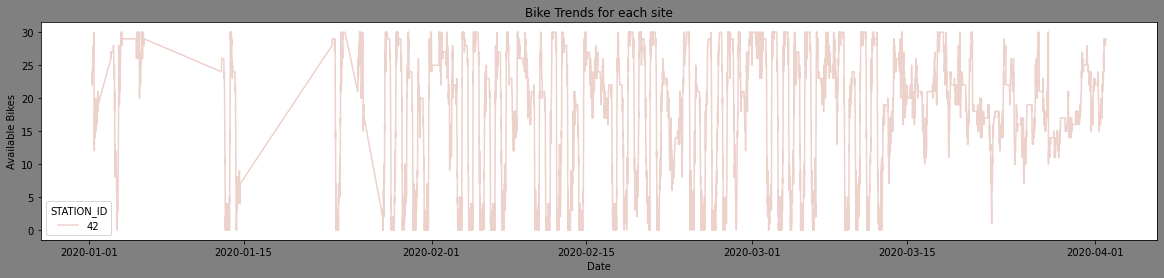

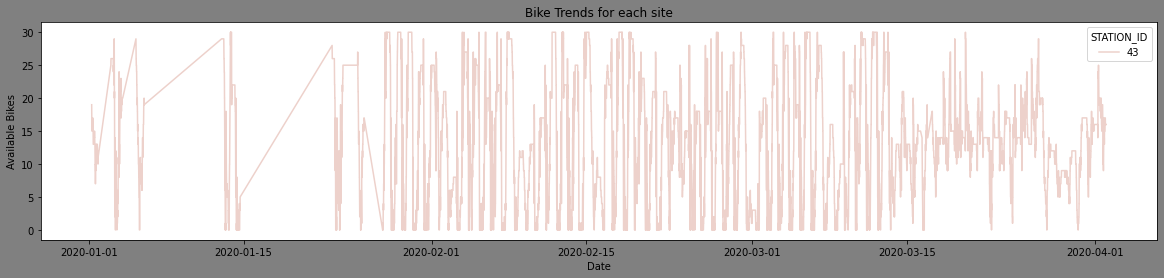

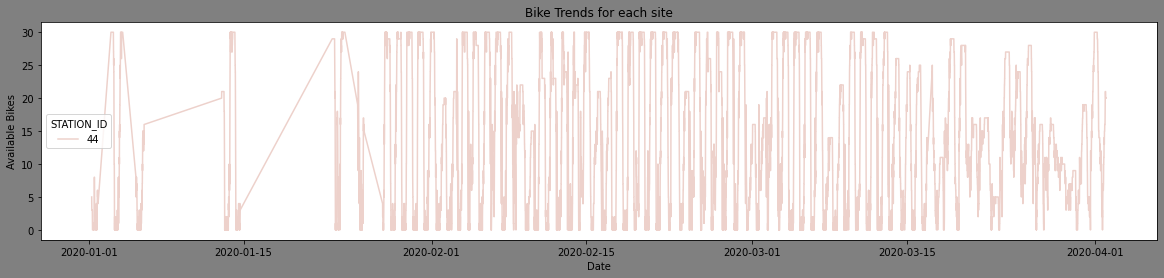

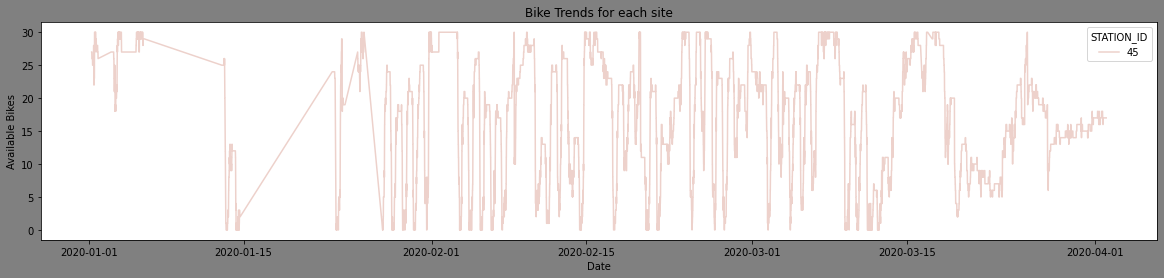

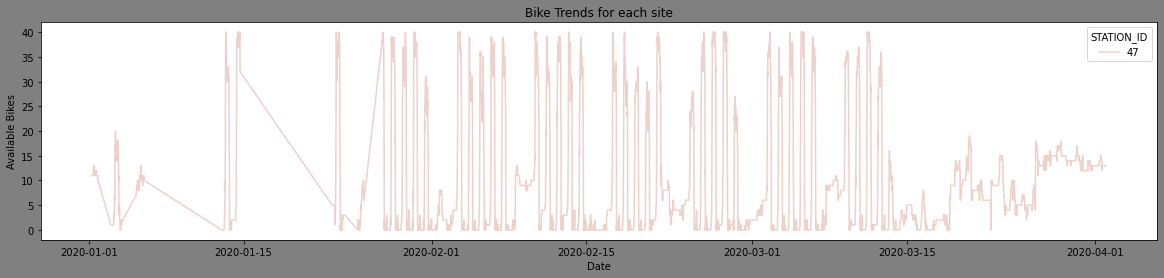

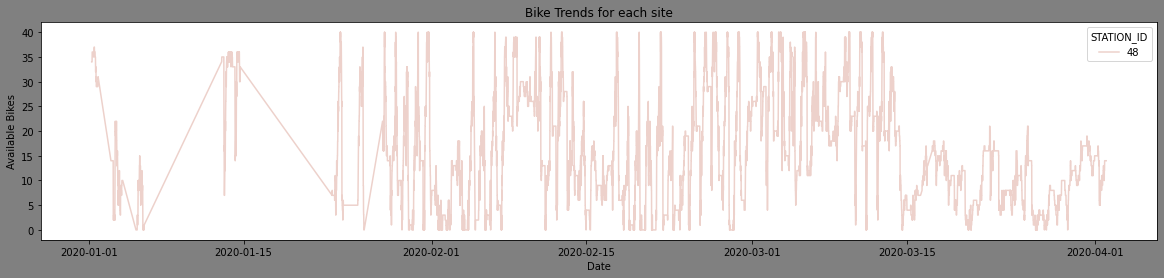

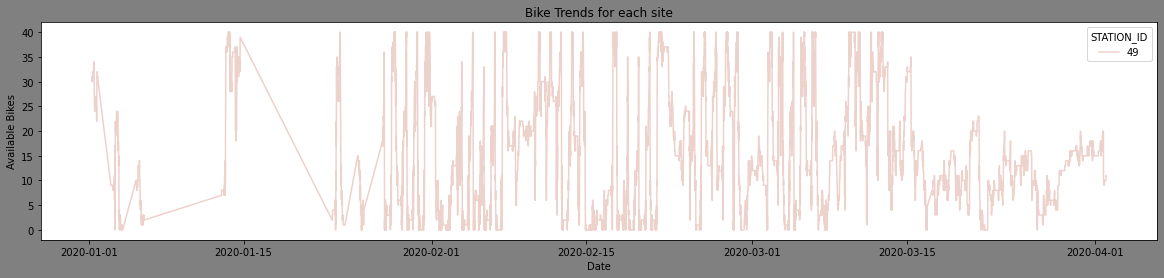

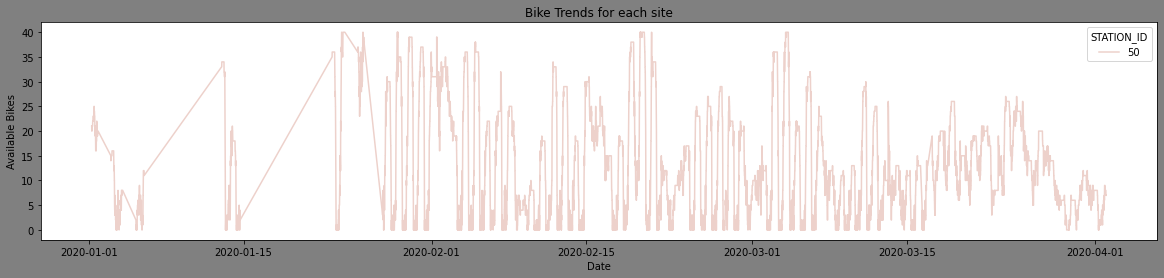

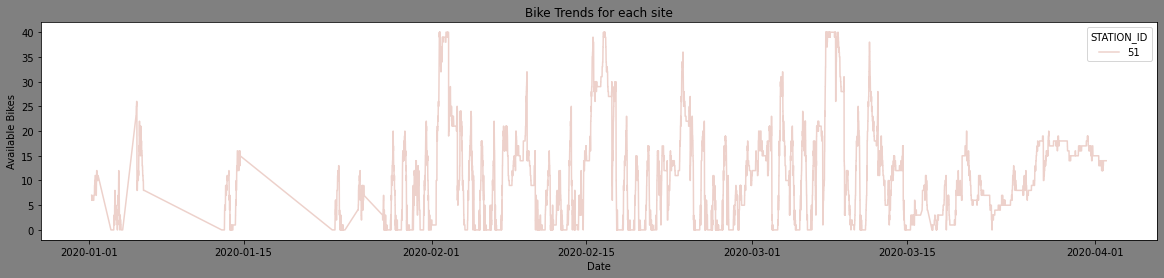

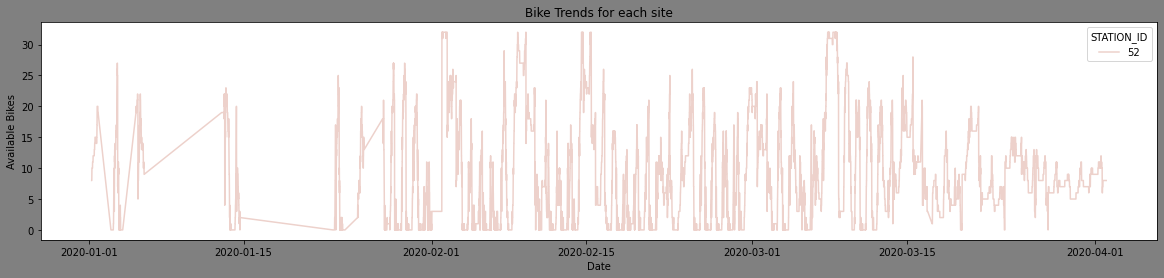

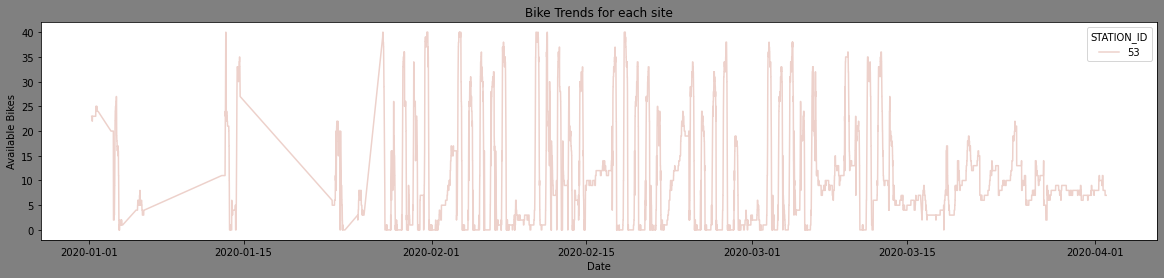

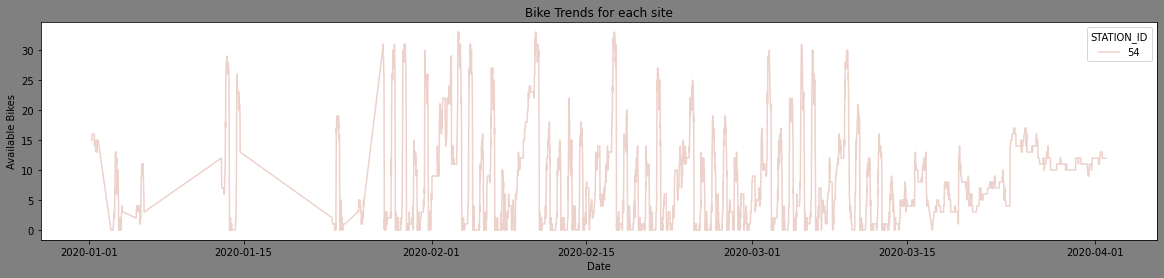

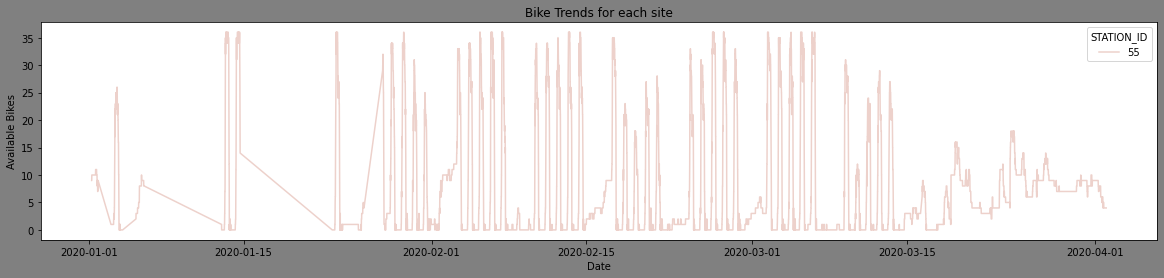

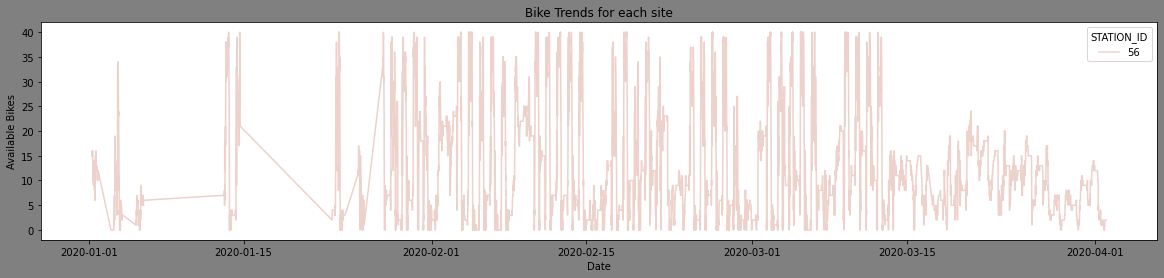

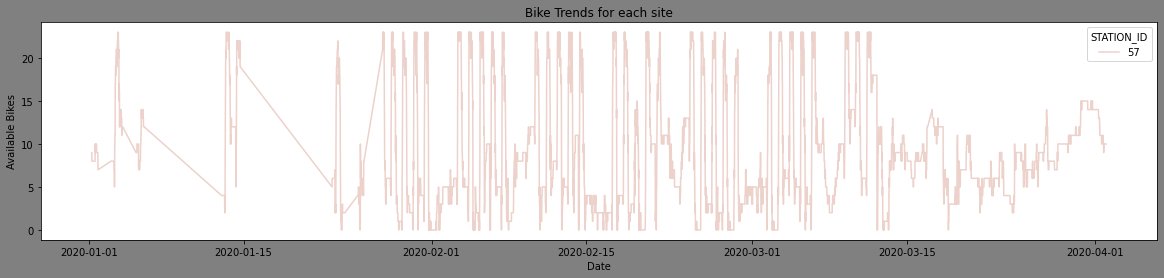

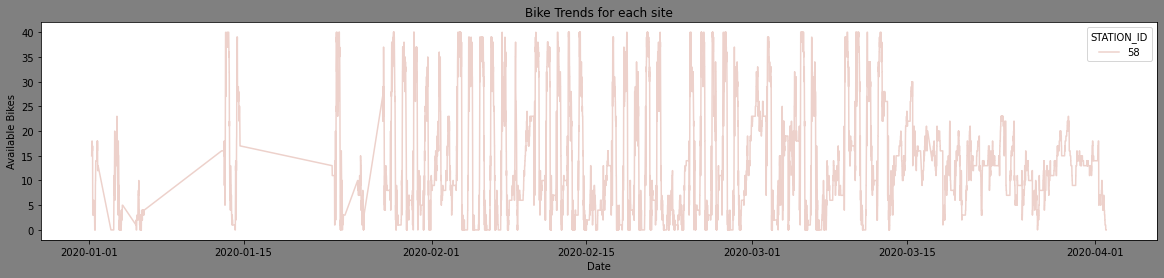

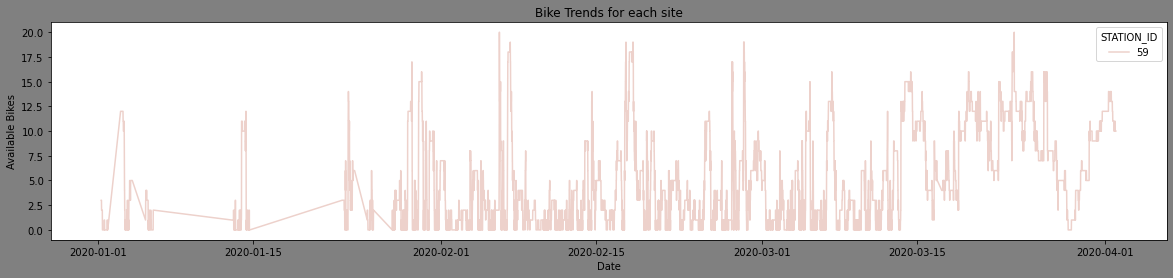

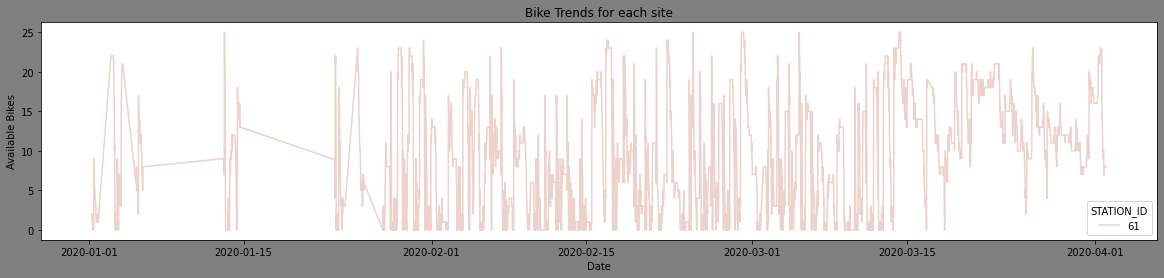

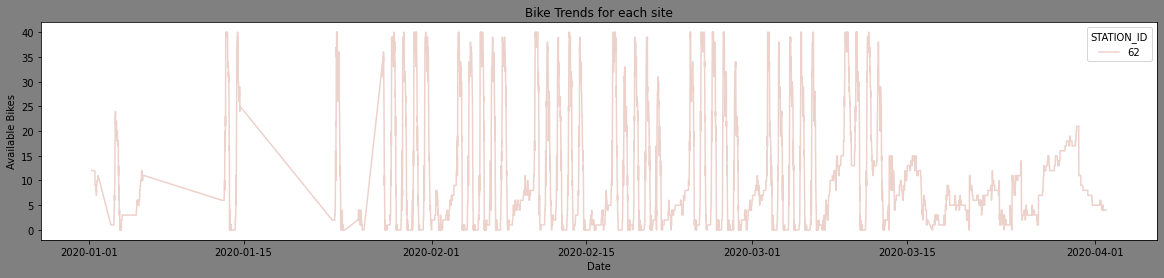

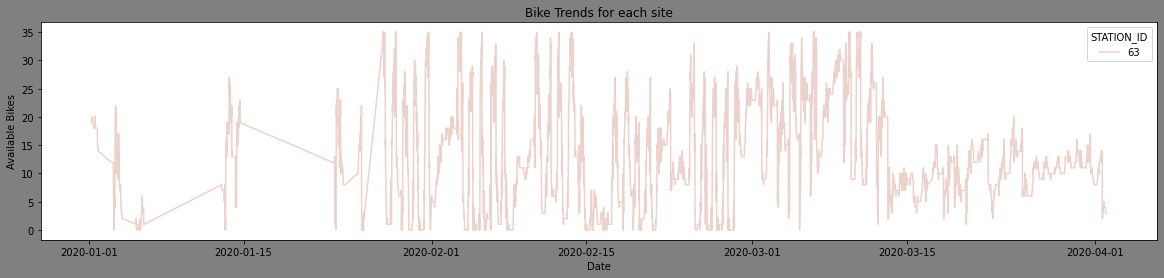

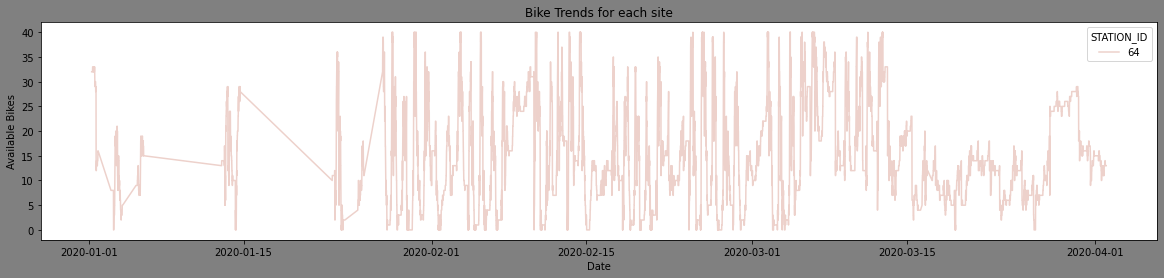

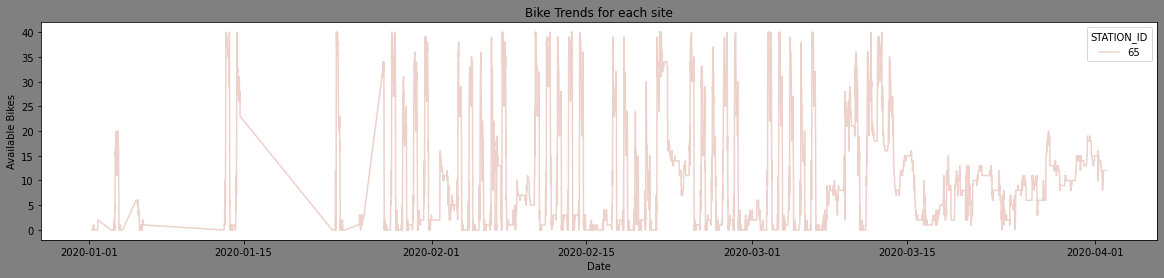

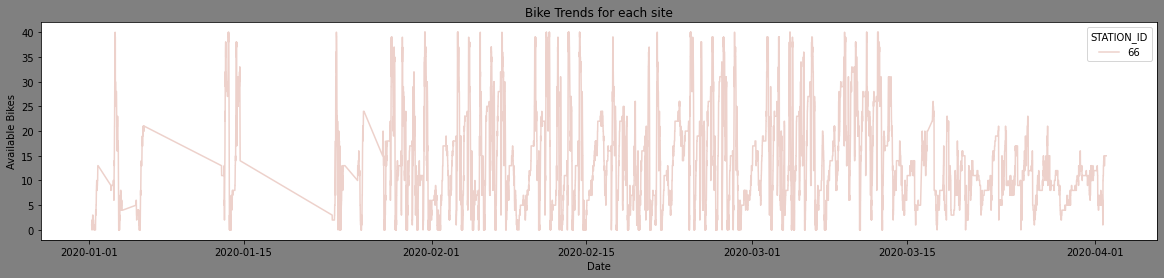

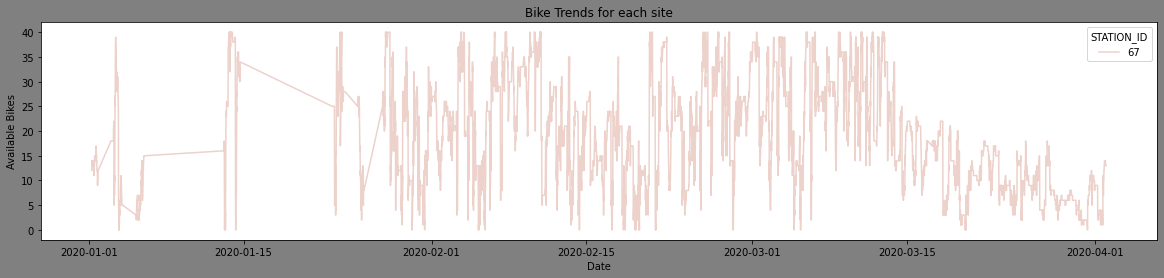

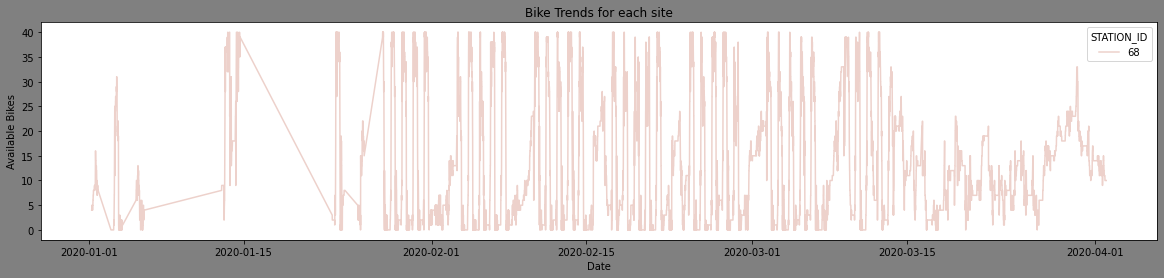

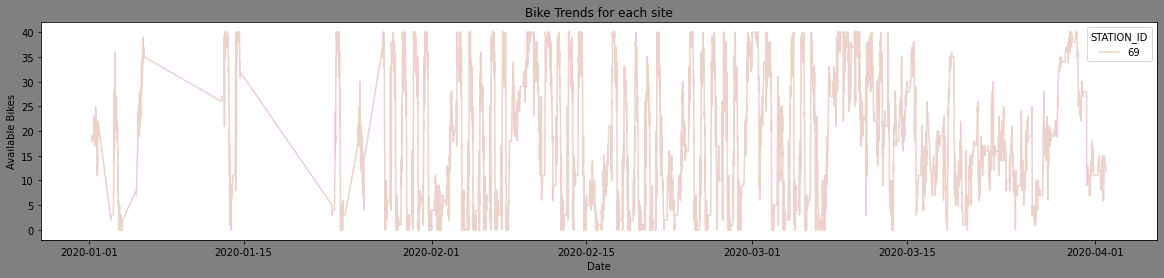

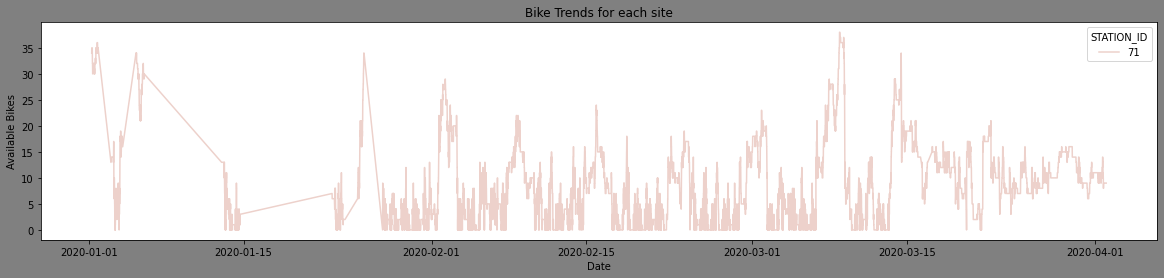

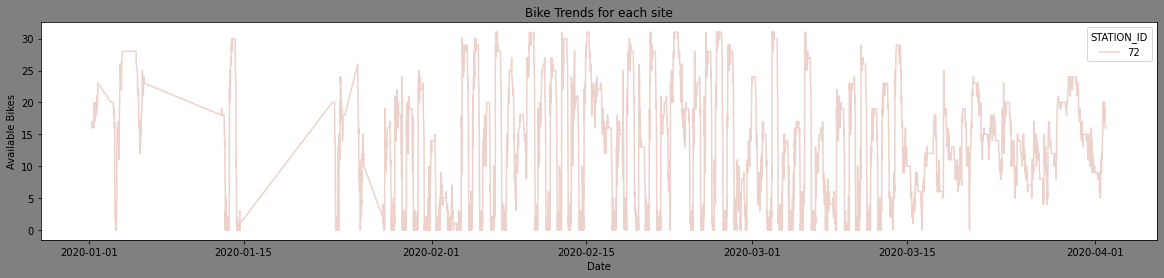

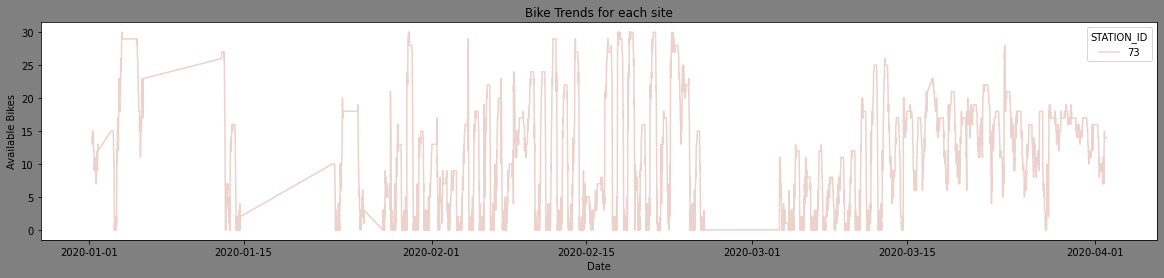

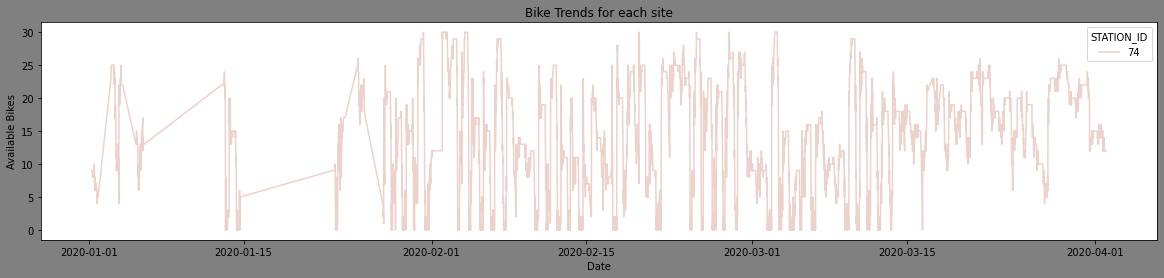

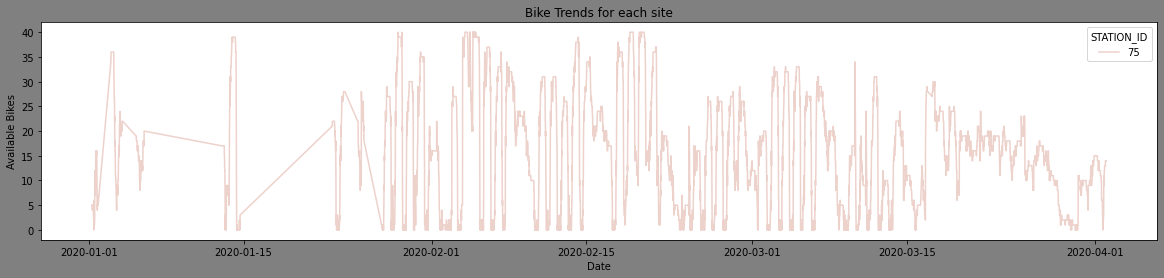

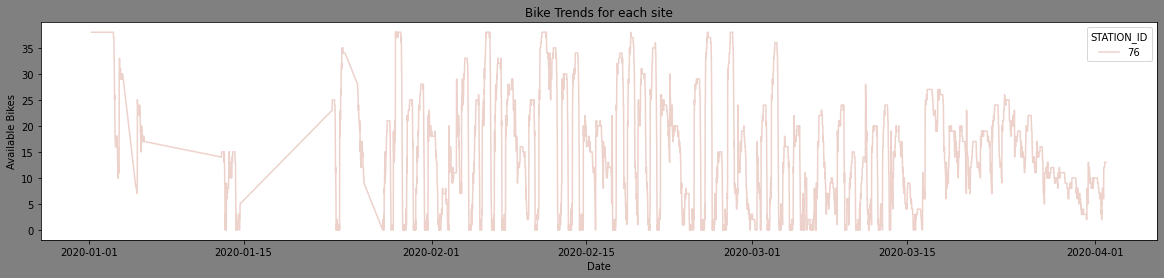

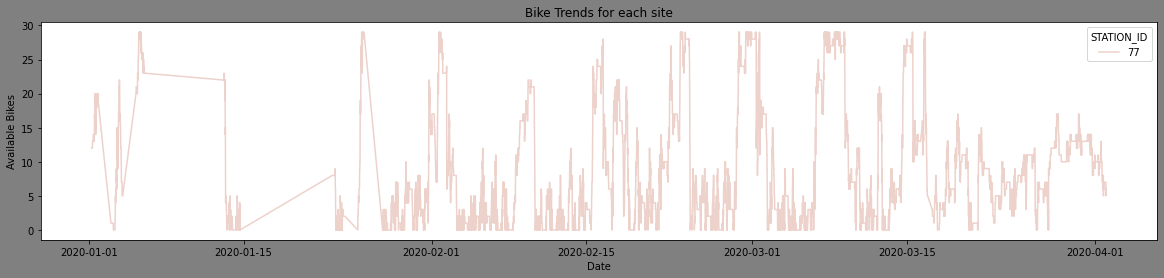

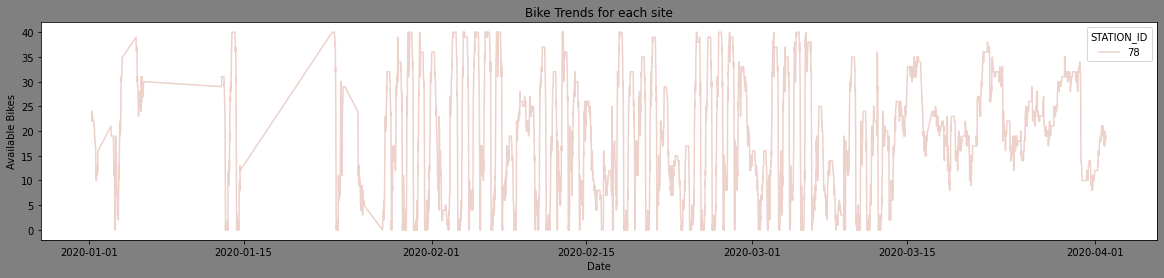

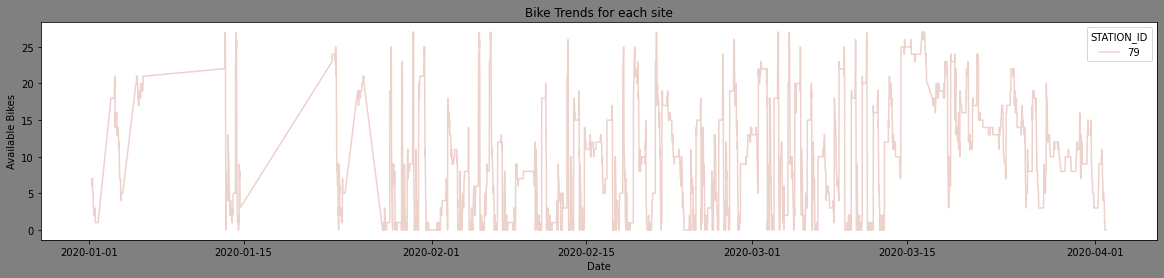

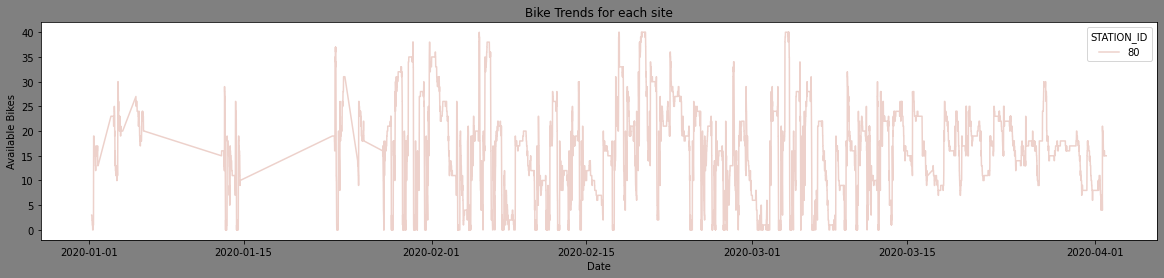

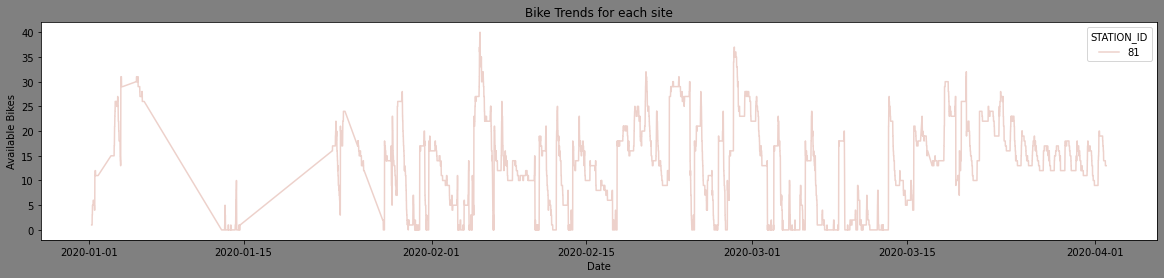

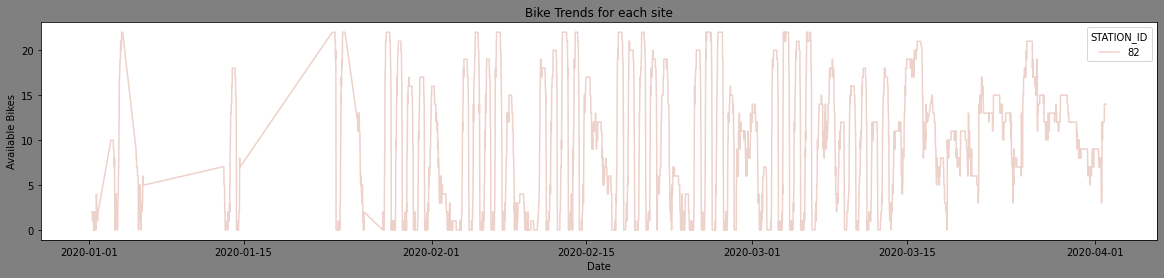

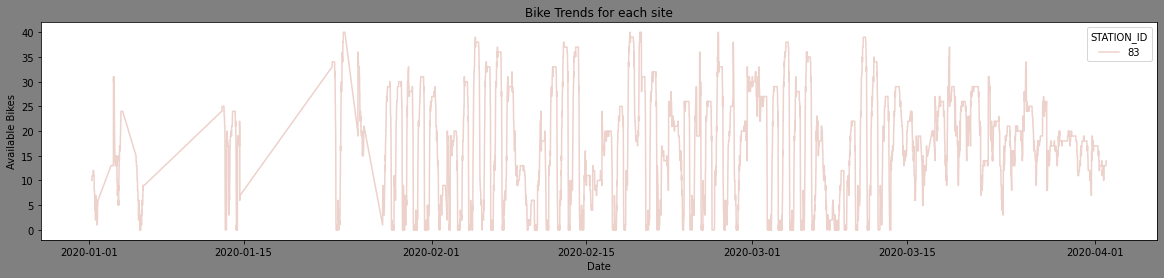

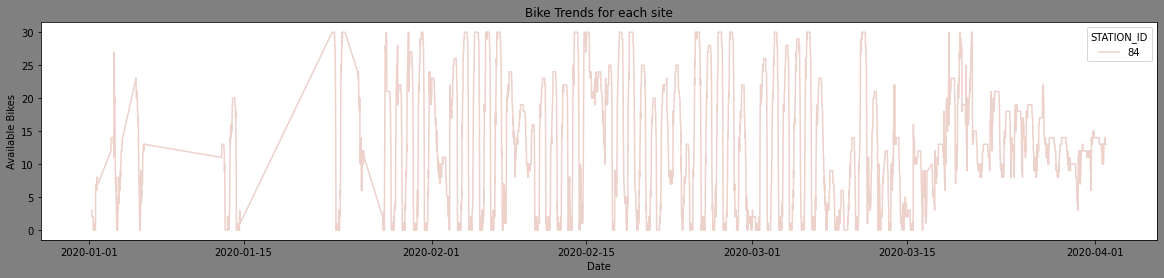

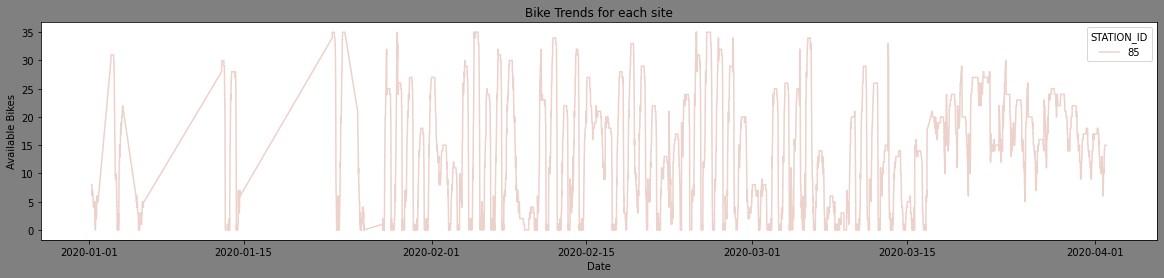

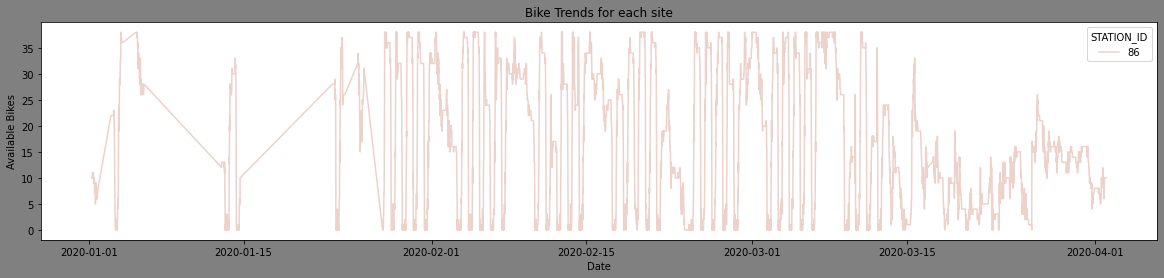

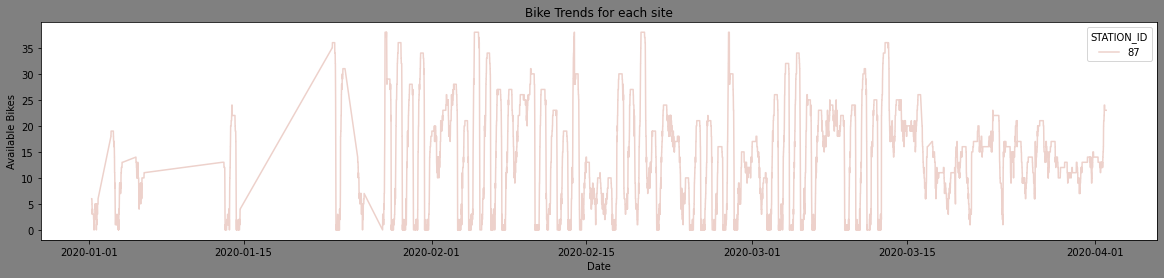

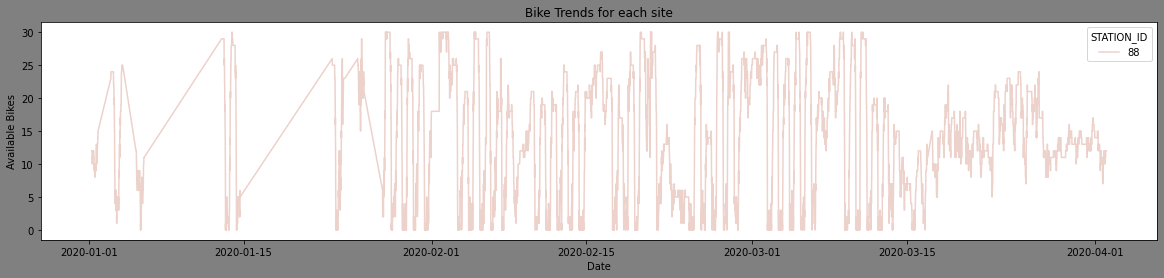

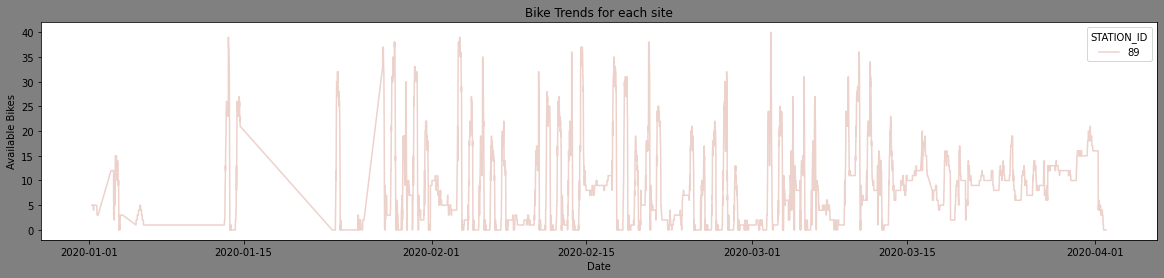

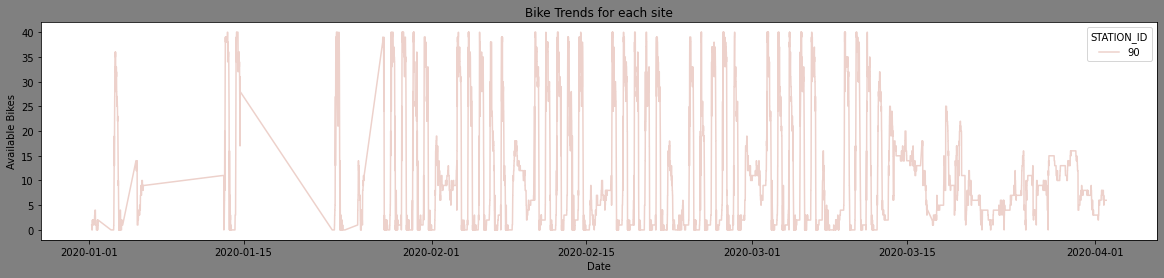

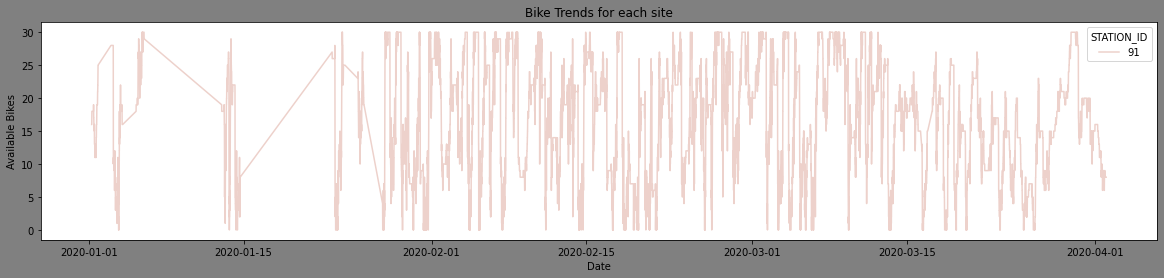

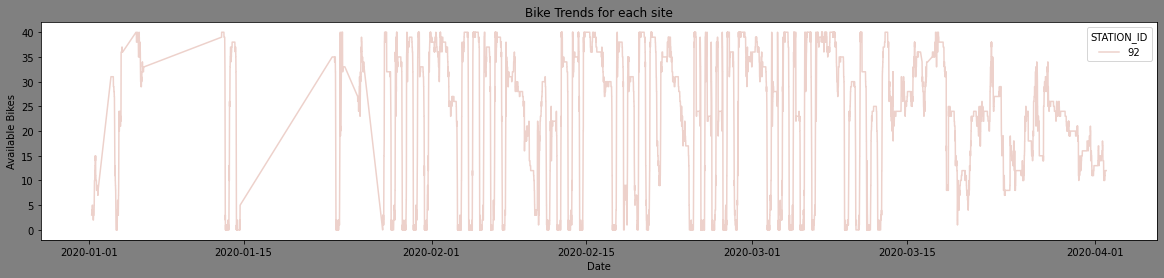

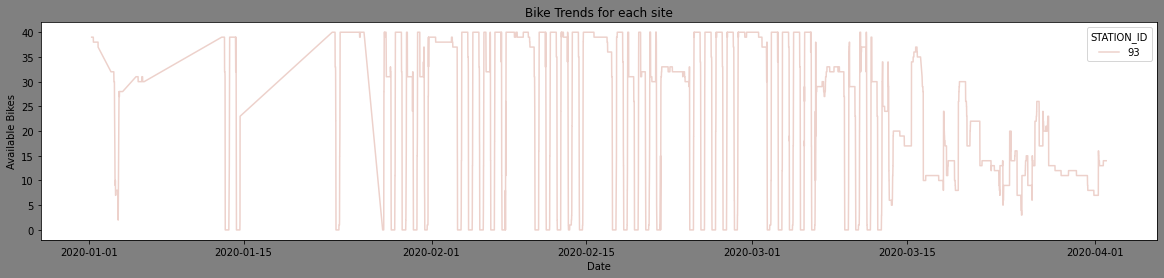

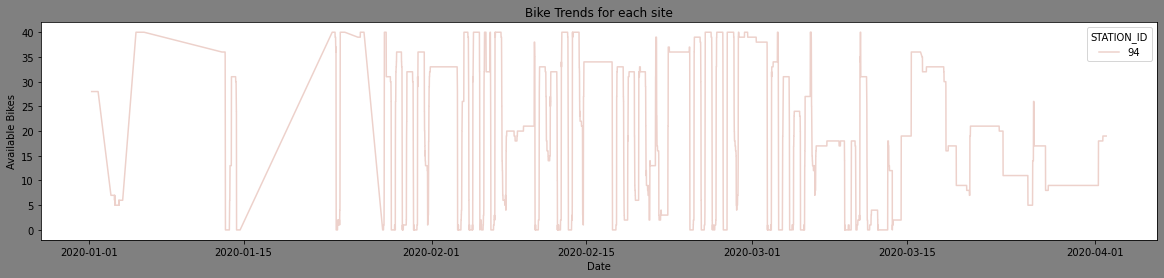

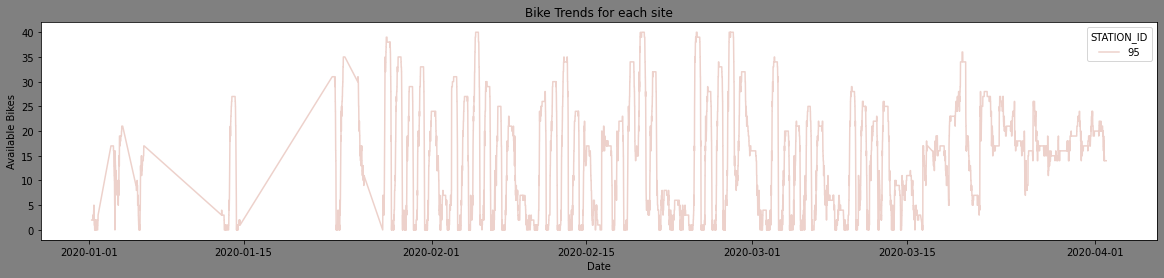

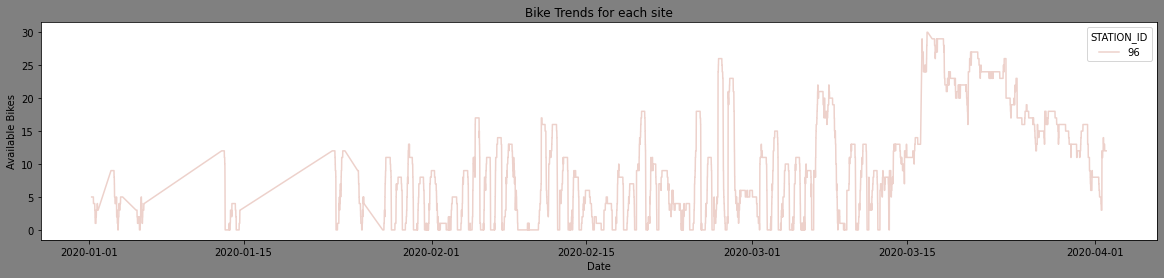

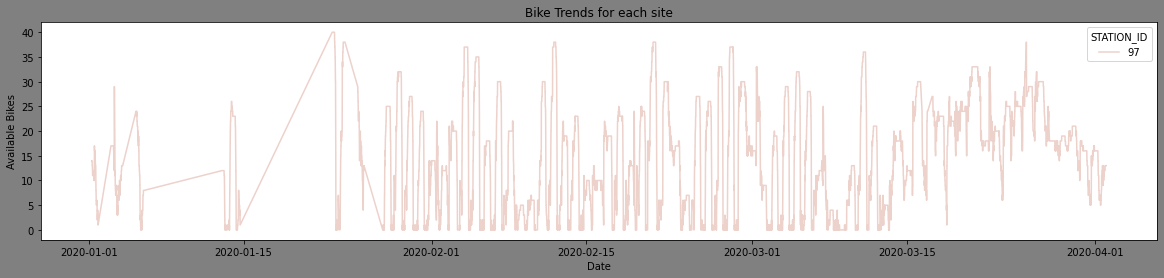

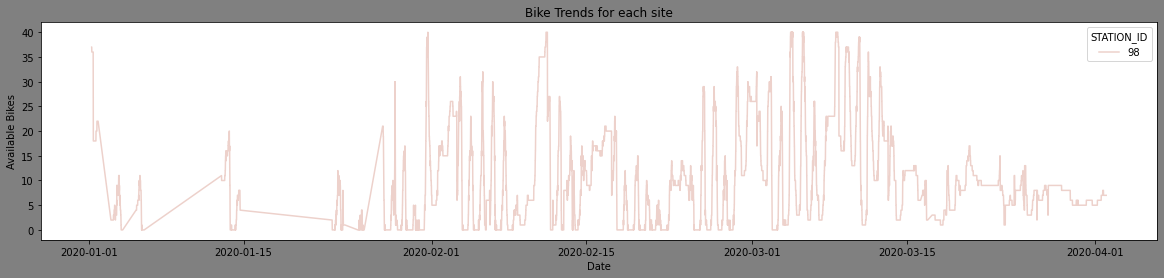

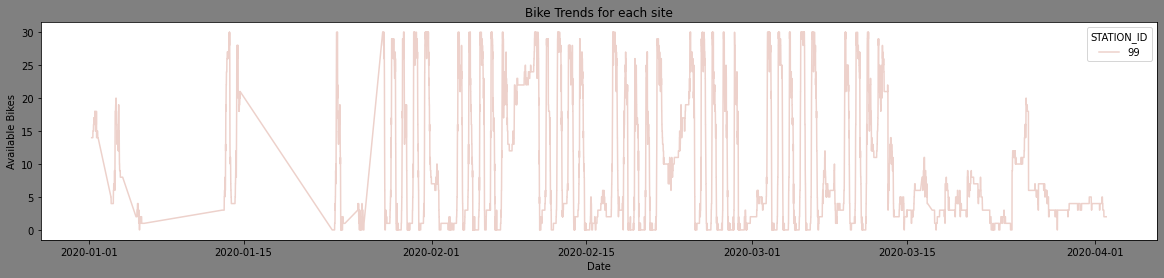

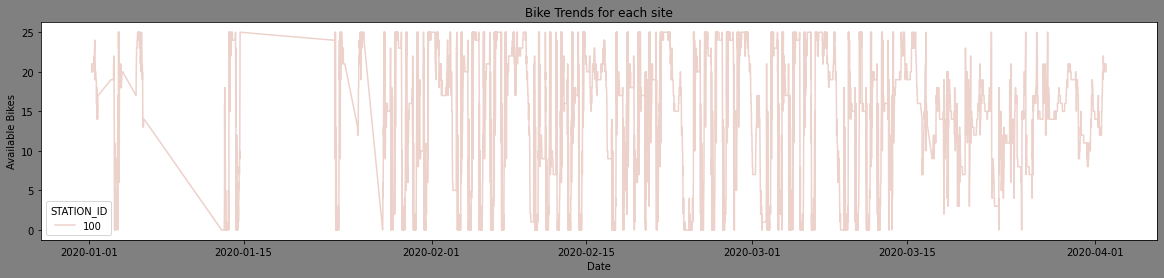

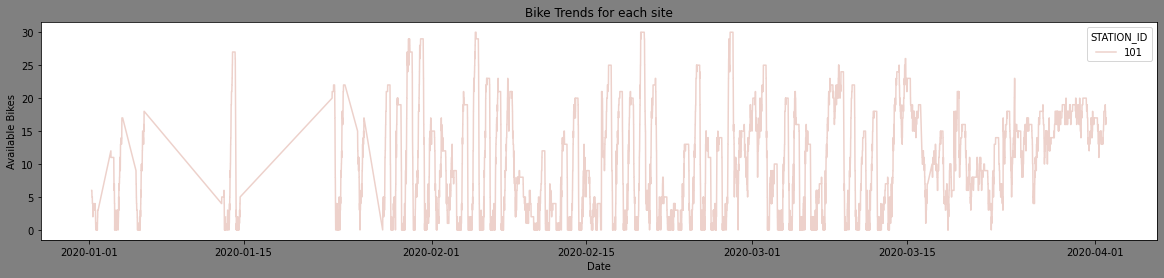

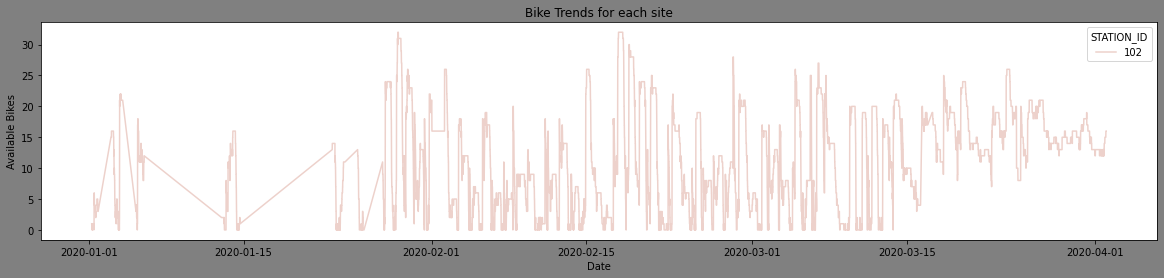

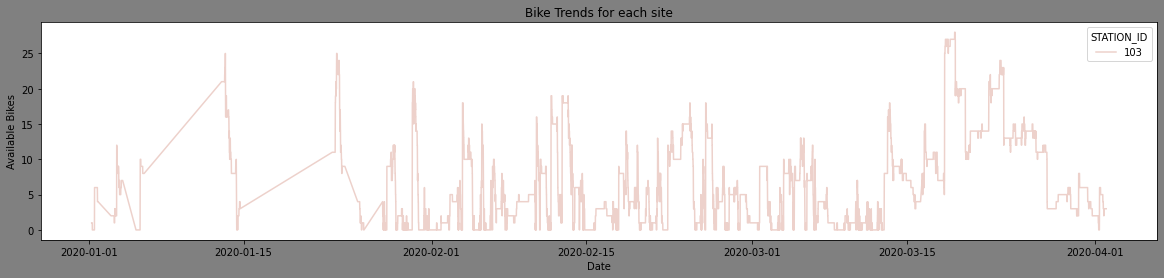

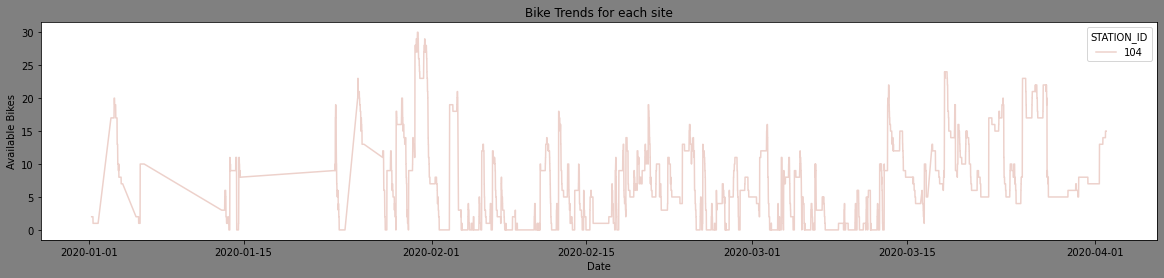

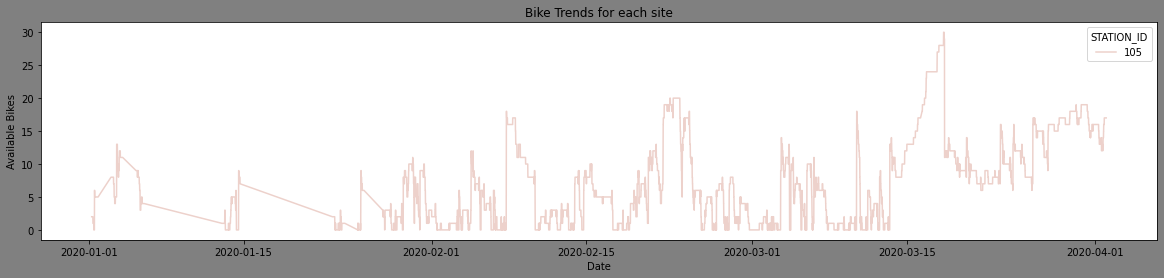

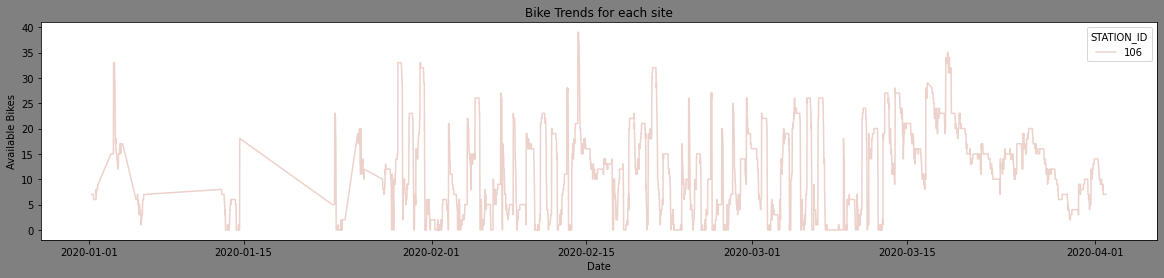

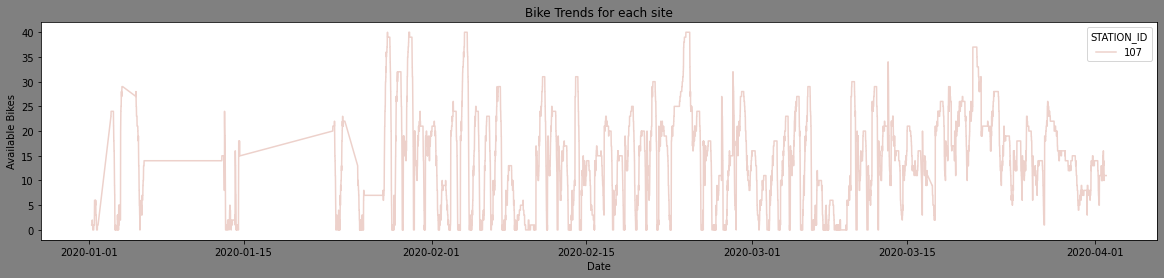

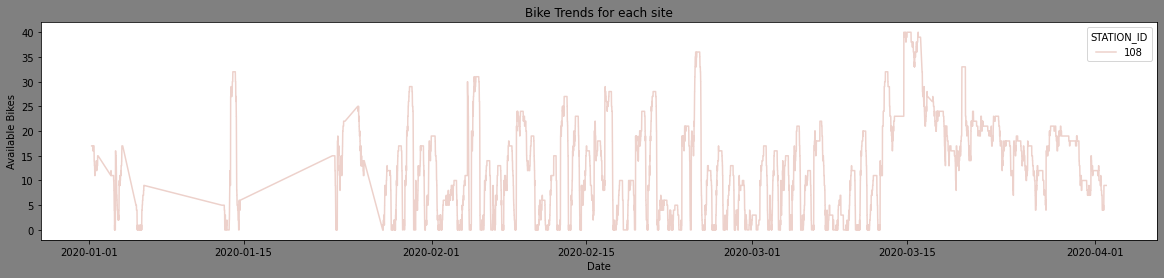

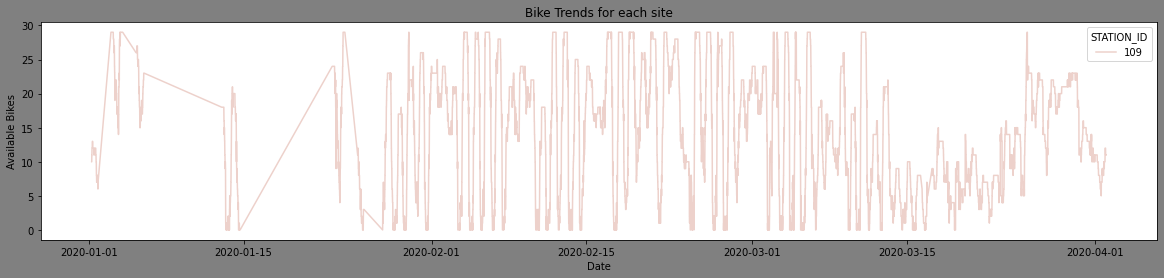

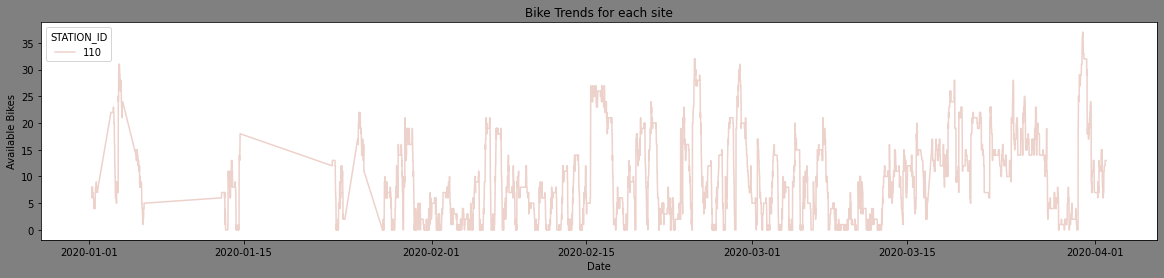

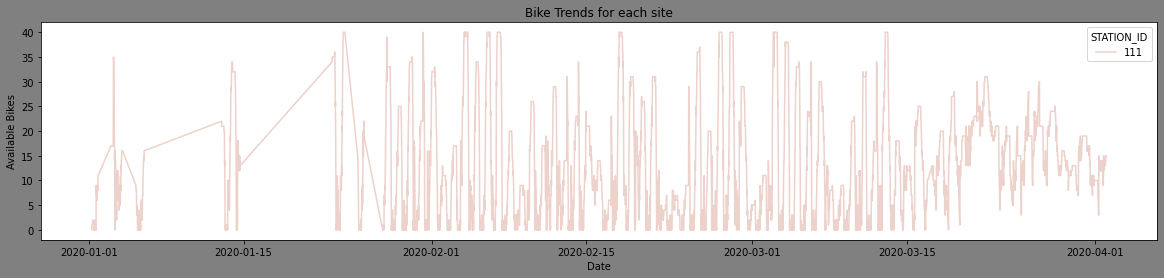

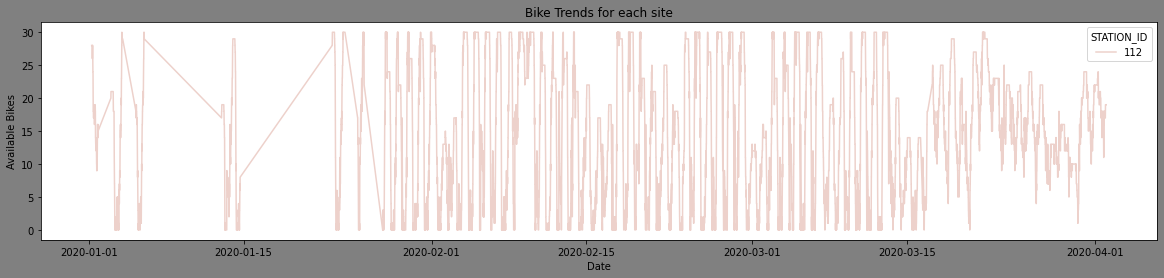

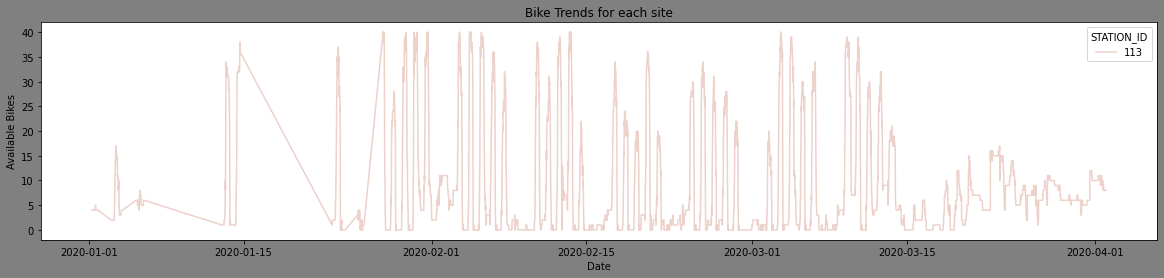

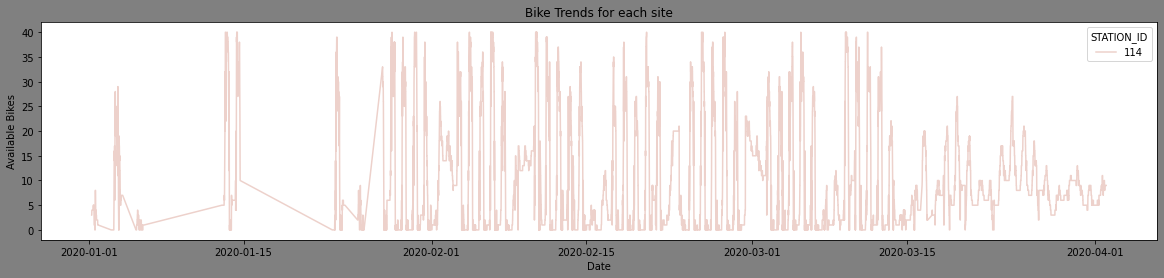

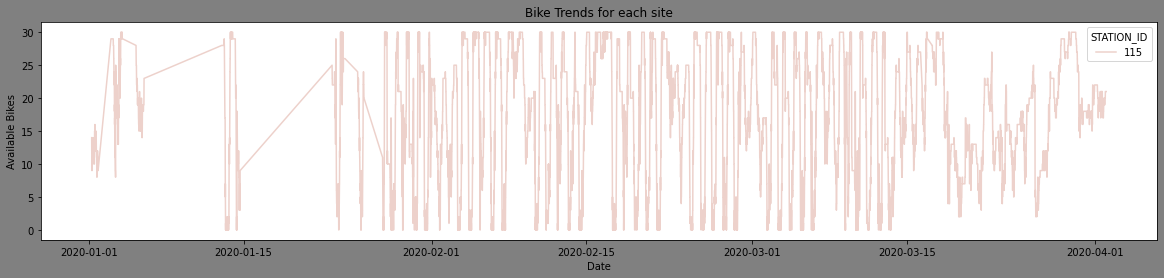

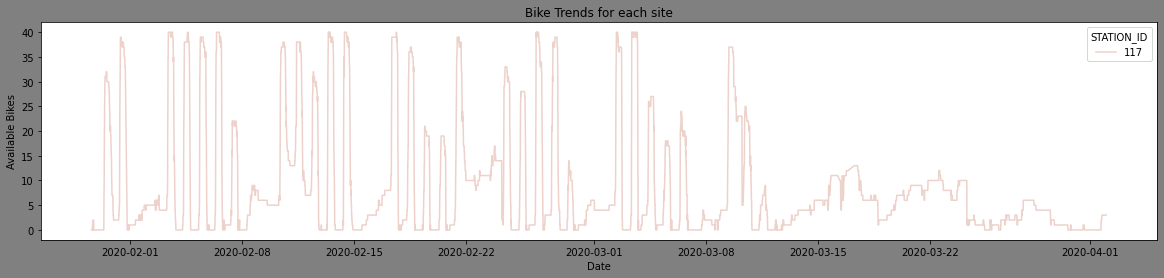

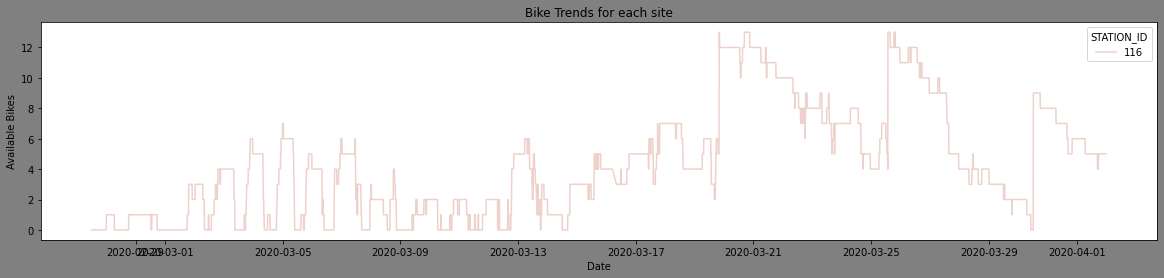

In [6]:
station_list = df_bikes_2020_q1_usage['STATION_ID'].unique()
for station in station_list:
    station_id = df_bikes_2020_q1_usage.STATION_ID == station
    df_station = df_bikes_2020_q1_usage[station_id]
    plt.figure(figsize=(20, 4), facecolor="#808080")
    available_bikes_trend_with_time = sns.lineplot(
        x=df_station["TIME"],
        y=df_station["AVAILABLE BIKES"],
        ci=None,
        data=df_station,
        hue="STATION_ID",
    )
    available_bikes_trend_with_time.set_title("Bike Trends for each site")
    available_bikes_trend_with_time.set_ylabel("Available Bikes")
    available_bikes_trend_with_time.set_xlabel("Date")
    available_bikes_trend_with_time.figure.savefig(f"Plots/Trends_For_Each_Site/{station}")

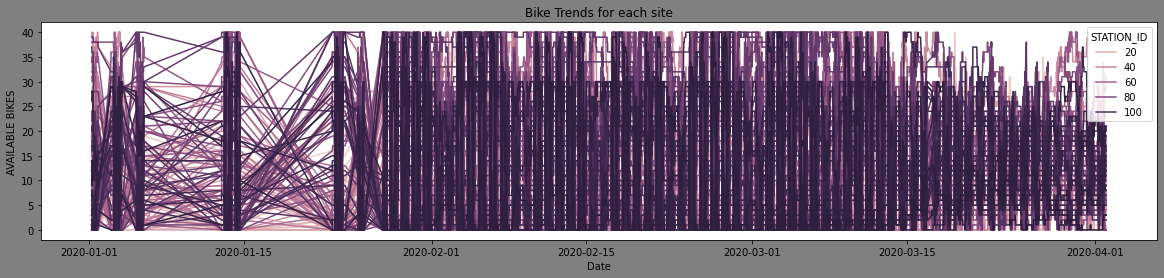

In [7]:
plt.figure(figsize=(20, 4), facecolor="#808080")
available_bikes_trend_with_time = sns.lineplot(
    x=df_bikes_2020_q1_usage["TIME"],
    y=df_bikes_2020_q1_usage["AVAILABLE BIKES"],
    ci=None,
    data=df_bikes_2020_q1_usage,
    hue="STATION_ID",
)
available_bikes_trend_with_time.set_title("Bike Trends for each site")
available_bikes_trend_with_time.set_ylabel("AVAILABLE BIKES")
available_bikes_trend_with_time.set_xlabel("Date")
available_bikes_trend_with_time.figure.savefig(f"Plots/Trends_For_Each_Site/0_All_Sites_Combined")

In [15]:
start_date=pd.to_datetime("29-01-2020",format='%d-%m-%Y')
df_bikes_2020_q1_usage_trim = df_bikes_2020_q1_usage[df_bikes_2020_q1_usage.TIME>start_date]

(2228278, 15)
(2002022, 15)


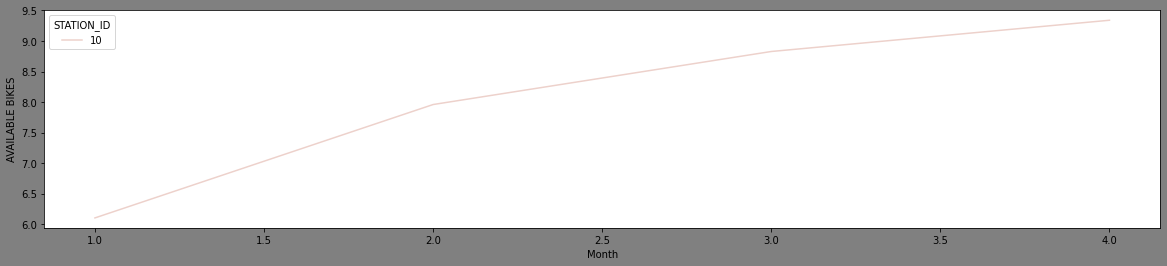

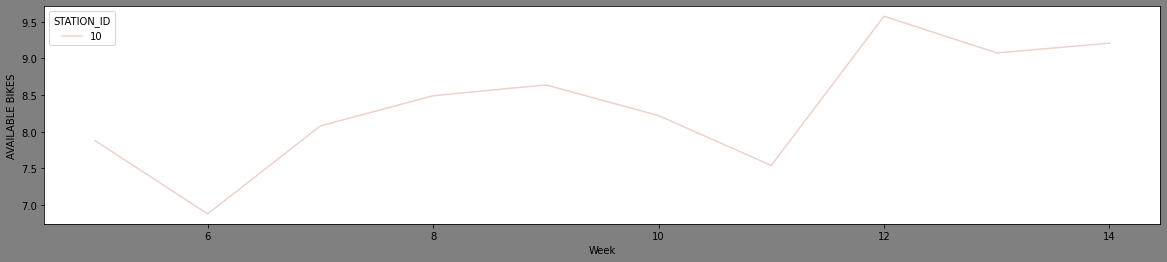

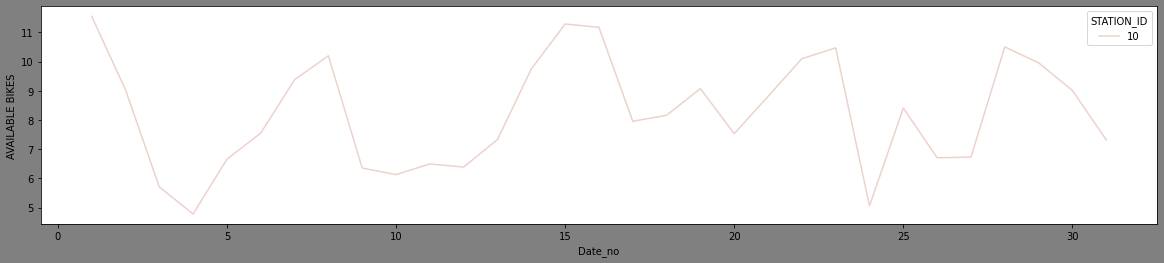

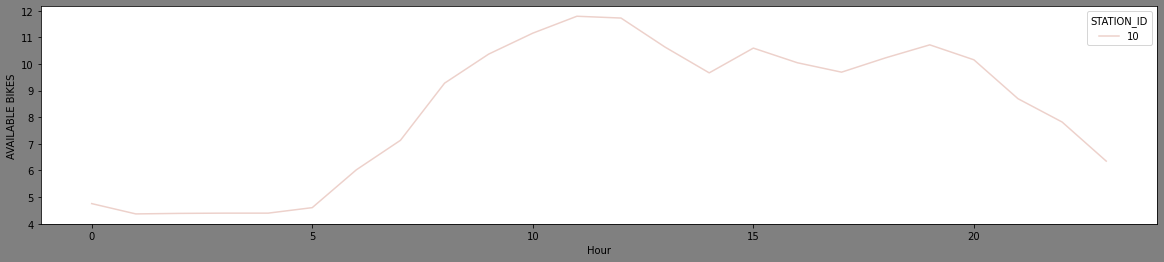

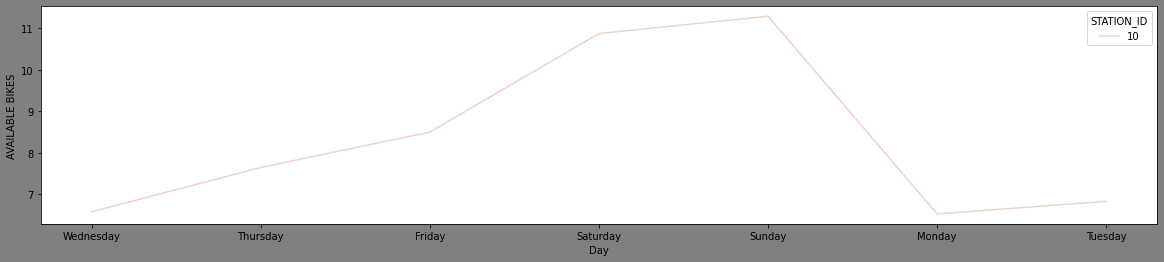

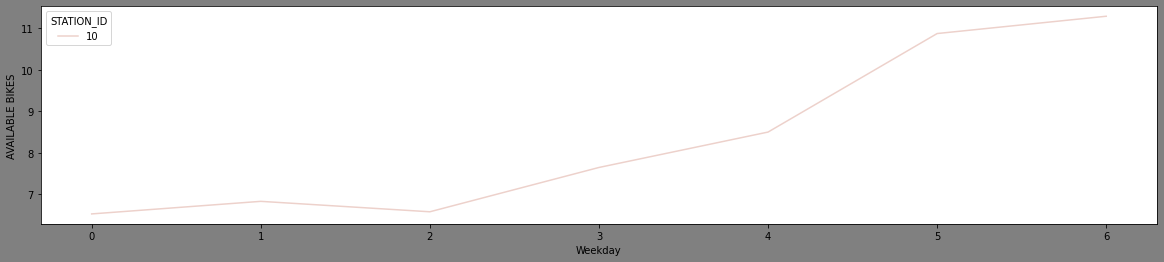

In [42]:
df_bikes_2020_q1_usage_trim["Month"] = df_bikes_2020_q1_usage_trim["TIME"].dt.month
df_bikes_2020_q1_usage_trim["Week"] = df_bikes_2020_q1_usage_trim["TIME"].dt.week
df_bikes_2020_q1_usage_trim["Date_no"] = df_bikes_2020_q1_usage_trim["TIME"].dt.day
df_bikes_2020_q1_usage_trim["Hour"] = df_bikes_2020_q1_usage_trim["TIME"].dt.hour
df_bikes_2020_q1_usage_trim["Day"] = df_bikes_2020_q1_usage_trim.TIME.dt.day_name()
df_bikes_2020_q1_usage_trim["Weekday"] = df_bikes_2020_q1_usage_trim["TIME"].dt.weekday
station_id = df_bikes_2020_q1_usage_trim.STATION_ID == 10
df_station = df_bikes_2020_q1_usage_trim[station_id]
time_features = [ "Month", "Week","Date_no", "Hour", "Day", "Weekday"]
for time_feature in time_features:
    plt.figure(figsize=(20, 4), facecolor="#808080")
    time_trends_plot = sns.lineplot(
        x=df_station[time_feature],
        y=df_station["AVAILABLE BIKES"],
        ci=None,
        data=df_station,
        hue="STATION_ID",
    )
    time_trends_plot.set_xlabel(time_feature)
    time_trends_plot.figure.savefig(f"Plots/{time_feature}.png")


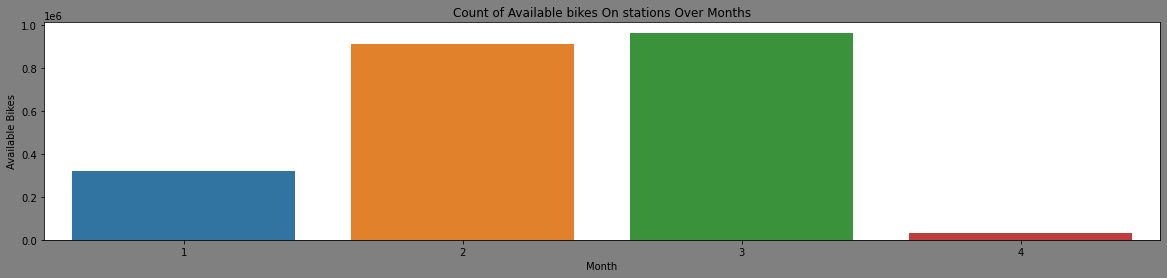

In [9]:
plt.figure(figsize=(20, 4), facecolor="#808080")
available_bikes_per_month = sns.countplot(data=df_bikes_2020_q1_usage, x=df_bikes_2020_q1_usage["Month"], palette=None)
available_bikes_per_month.set_title("Count of Available bikes On stations Over Months")
available_bikes_per_month.set_ylabel("Available Bikes")
available_bikes_per_month.set_xlabel("Month")
available_bikes_per_month.figure.savefig("Plots/count_of_available_bikes_per_month_2020_q1.png")